## 1. Binary Search Trees

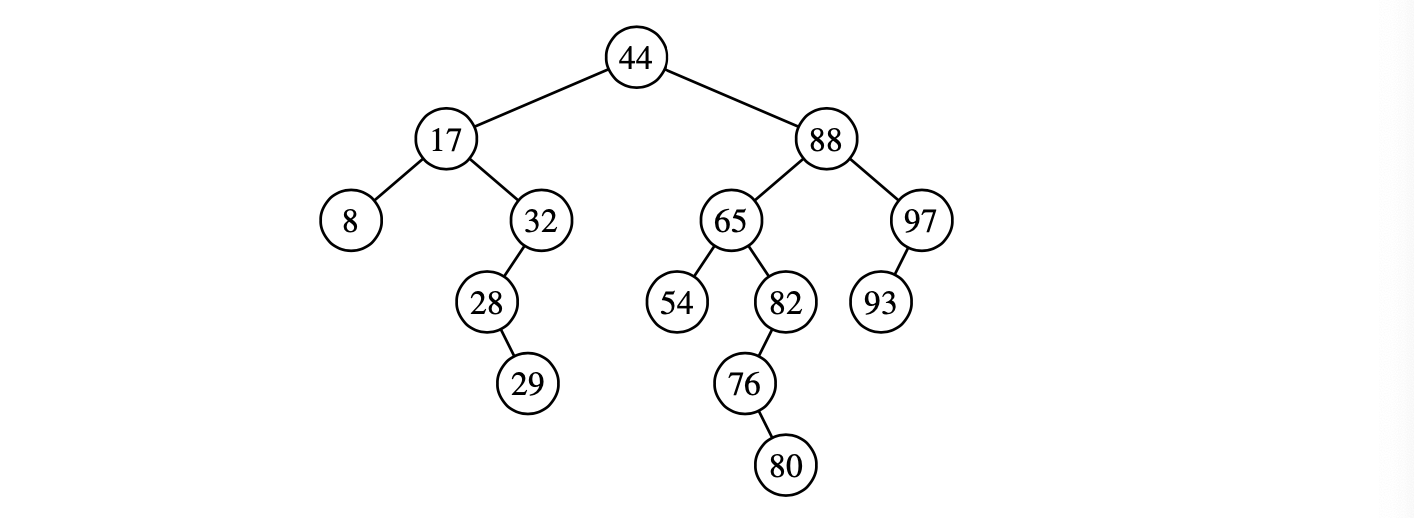

### 1.1 Navigating a Binary Search Tree

**Inorder traversal**:
    - Inorder traversal of a binary search tree visits positions in increasing order of their keys.
    
Algorithm: 

after(p):
    - If right(p) is not None then
    {successor is leftmost position in p's right subtree}
        walk = right(p)
        while left(walk) is not None do
            walk = left(walk)
        return walk
    - else
    {successor is nearest ancestor having p in its left subtree}
        walk = p
        ancestor = parent(walk)
        while ancestor is not None and walk == right(ancestor) do
            walk = ancestor
            ancestor = parent(walk)
        return ancestor

### 1.2 Searches

Algorithm:

TreeSearch(T,p,k):
    - if k == p.key() then
    {successful search}
        return p
    - elif k < p.key() and T.left(p) is not None then
    {recur on left subtree}
        return TreeSearch(T, T.left(p),k)
    - elif k > p.key() and T.right(p) is not None then
    {recur on right subtree}
        return TreeSearch(T, T.right(p),k)
    - return p
    
In the case of unsuccessful search, the TreeSearch algorithm returns the final position explored on the search path
    - Will make use of when insert a new item
    

### 1.3 Insertions and Deletions

#### Insertion

Algorithm

TreeInsert(T,k,v):
    - p = TreeSearch(T, T.root(), k)
    - if k == p.key() then
        p.value = v
    - elif k < p.key() then
        p.left = (k,v)
    - else
        p.right = (k,v)
        
#### Deletion

1. The node to be deleted has at most one child:
    - delete the node and replace it with its child
2. The node has two children:
    - r = before(p)
    - delete the node and replace it with r
    - delete the node r
    
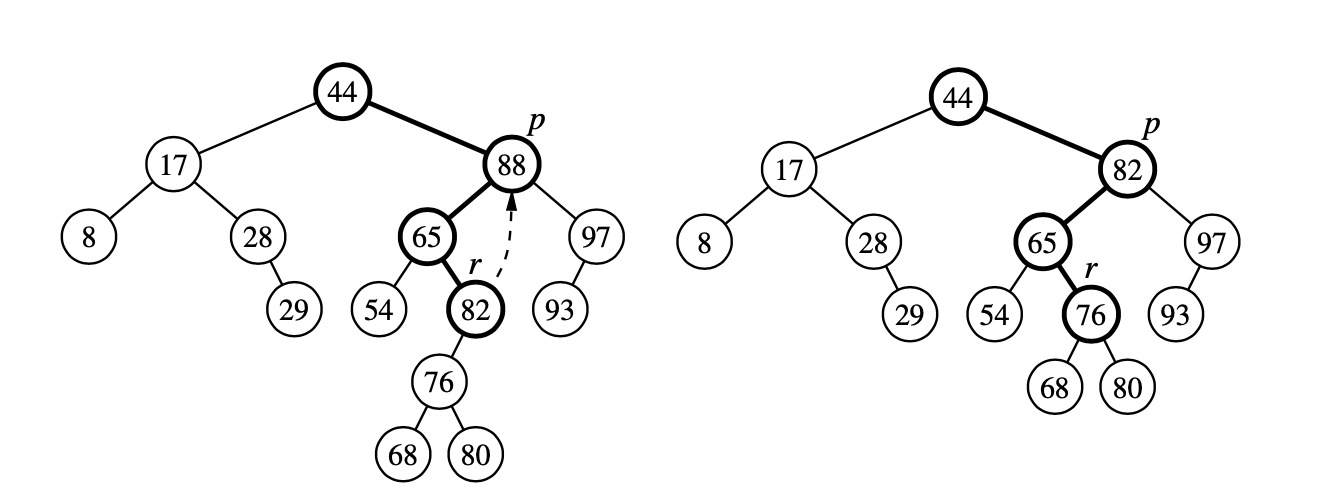

#### 1.4 Python Implementation

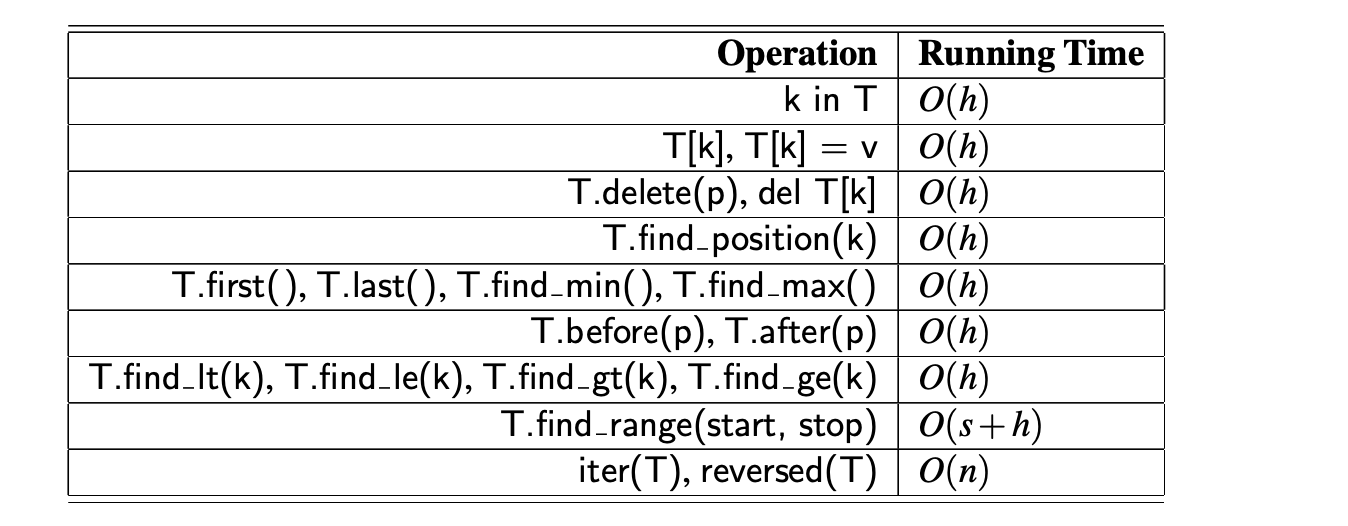

In [1]:
from TreeImport import LinkedBinaryTree
from MapImport import MapBase

class TreeMap(LinkedBinaryTree, MapBase):
    '''
    Sorted map implementation using a binary search tree
    '''
    
    #------------------Override Position class-------------------------
    class Position(LinkedBinaryTree.Position):
        def key(self):
            return self.element()._key
        def value(self):
            return self.element()._value
        
    #------------------Nonpublic utilities-----------------------------
    def _subtree_search(self,p,k):
        '''
        Return position of p's subtree having key k, 
        or last node searched
        '''
        if k == p.key():
            return p
        elif k < p.key():
            if self.left(p) is not None:
                return self._subtree_search(self.left(p),k)
        else:
            if self.right(p) is not None:
                return self._subtree_search(self.right(p),k)
        return p
    
    def _subtree_first_position(self,p):
        '''
        Return Position of first item in subtree rooted at p
        '''
        walk = p
        while self.left(walk) is not None:
            walk = self.left(walk)
        return walk
    
    def _subtree_last_position(self,p):
        walk = p
        while self.right(walk) is not None:
            walk = self.right(walk)
        return walk
    
    #------------------Positional method----------------------------- 
    def first(self):
        if len(self) > 0:
            return self._subtree_first_position(self.root()) 
        return None
    
    def last(self):
        if len(self) > 0:
            return self._subtree_;ast_position(self.root()) 
        return None
    
    def before(self, p):
        '''
        Return the Position just before p in the natural order
        Return None if p is the first position
        '''
        self._validate(p)
        if self.left(p):
            return self._subtree_last_position(self.left(p))
        else:
            # walk upward
            walk = p
            above = self.parent(walk)
            while above is not None and walk == self.left(above):
                walk = above
                above = self.parent(walk)
            return above
    
    def after(self, p):
        self._validate(p)
        if self.right(p):
            return self._subtree_first_position(self.right(p))
        else:
            walk = p
            above = self.parent(walk)
            while above is not None and walk == self.right(above):
                walk = above
                above = self.parent(walk)
            return above
        
    def find_position(self, k):
        '''
        Return position with key k, or else neighbor(or None if empty)
        '''
        if self.is_empty():
            return None
        else:
            p = self._subtree_search(self.root(),k)
            # hook for balanced tree subclasses
            self._realance_access(p)
            return p
        
    def find_min(self):
        if self.is_empty():
            return None
        p = self.first()
        return (p.key(), p.value())
    
    def find_ge(self, k):
        'greater than or equal to'
        if self.is_empty():
            return None
        p = self.find_position(k)
        if p.key() < k:
            p = self.after(p)
        return (p.key(),p.value()) if p is not None else None
    
    def find_range(self, start, stop):
        'Iterate all (key,value) pairs such that start <= key < stop.'
        if not self.is_empty():
            if start is None:
                p = self.first()
            else:
                p = self.find_position(start)
                if p.key() < start:
                    p = self.after(p)
            while p is not None and (stop is None or p.key() < stop):
                yield(p.key(), p.value())
                p = self.after(p)
                
    def __getitem__(self, k):
        if self.is_empty():
            raise KeyError('Key Error: ' + repr(k))
        else:
            p = self._subtree_search(self.root(),k)
            self._rebalance_access(p)
            if k != p.key():
                raise KeyError('Key Error: ' + repr(k))
            return p.value()
        
    def __setitem__(self, k, v):
        if self.is_empty():
            leaf = self._add_root(self._Item(k,v))
        else:
            p = self._subtree_search(self.root(),k)
            if p.key() == k:
                p.element()._value = v
                self._rebalance_access(p)
                return
            else:
                item = self._Item(k,v)
                if p.key() < k:
                    leaf = self._add_right(p, item)
                else:
                    leaf = self._add_left(p, item)
        self._rebalance_insert(leaf)
        
    def __iter__(self):
        p = self.first()
        while p is not None:
            yield p.key()
            p = self.after(p)
            
    def delete(self, p):
        'Remove item at given position'
        self._validate(p)
        if self.left(p) and self.right(p):
            replacement = self._subtree_last_position(self.left(p))
            self._replace(p, replacement.element())
            p = replacement
        # now p has at most one child
        parent = self.parent(p)
        self._delete(p)
        self._rebalance_delete(parent)
        
    def __delitem__(self, k):
        'Remove item with key k'
        if not self.is_empty():
            p = self._subtree_search(self.root(),k)
            if k == p.key():
                self.delete(p)
                return
            self._rebalance_access(p)
        raise KeyError('Key Error: ' + repr(k))
        
    #------------------Nonpublic utilities for rotate------------------
    def _relink(self, parent, child, make_left_child):
        '''
        Relink parent node with child node
        Allow child node to be None
        '''
        if make_left_child:
            parent._left = child
        else:
            parent._right = child
        if child is not None:
            child._parent = parent
            
    def _rotate(self, p):
        '''
        Rotate Position p above its parent
        '''
        x = p.node
        y = x.parent
        z = y.parent
        if z is None:
            self._root = x
            x._parent = None
        else:
            self._relink(z, x, y == z._left)
        # rotate x and y, including transfer of middle subtree
        if x == y._left:
            # x._right becomes left child of y
            self._relink(y,x._right, True)
            # y becomes right child of x
            self._relink(x,y,False)
        else:
            self._relink(y, x._left, False)
            self._relink(x, y, True)
            
    def _restructure(self, x):
        '''
        Perfrom trinode restructure of Position x with parent/grandparent
        '''
        y = self.parent(x)
        z = self.parent(y)
        # single rotation
        if (x == self.right(y)) == (y == self.right(z)):
            # single rotation of y
            self._rotate(y)
            # y is new subtree root
            return y
        # double rotation
        else:
            self._rotate(x)
            self._rotate(x)
            return x

## 2. Balanced Search 

**Rotation:**
    - Primary operation to rebalance a binary search tree
    - O(1) since constant number of parent-child relationship is modified
    
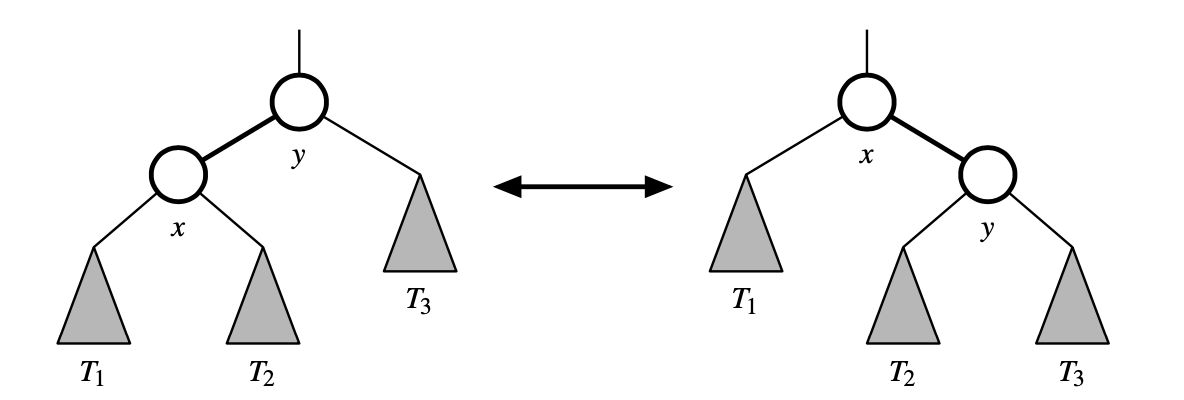

<font color = 'red'> x < T2 < y </font>
    - The depth of each node in T1 is reduced by 1
    - The depth of each node in T3 is increased by 1


**Trinode restructuring:**
    - Compound rotation operation
    - 原结构从左到右依次为a，b，c，从上到下依次为z，y，x
    - b对应的node上升为原子树的根

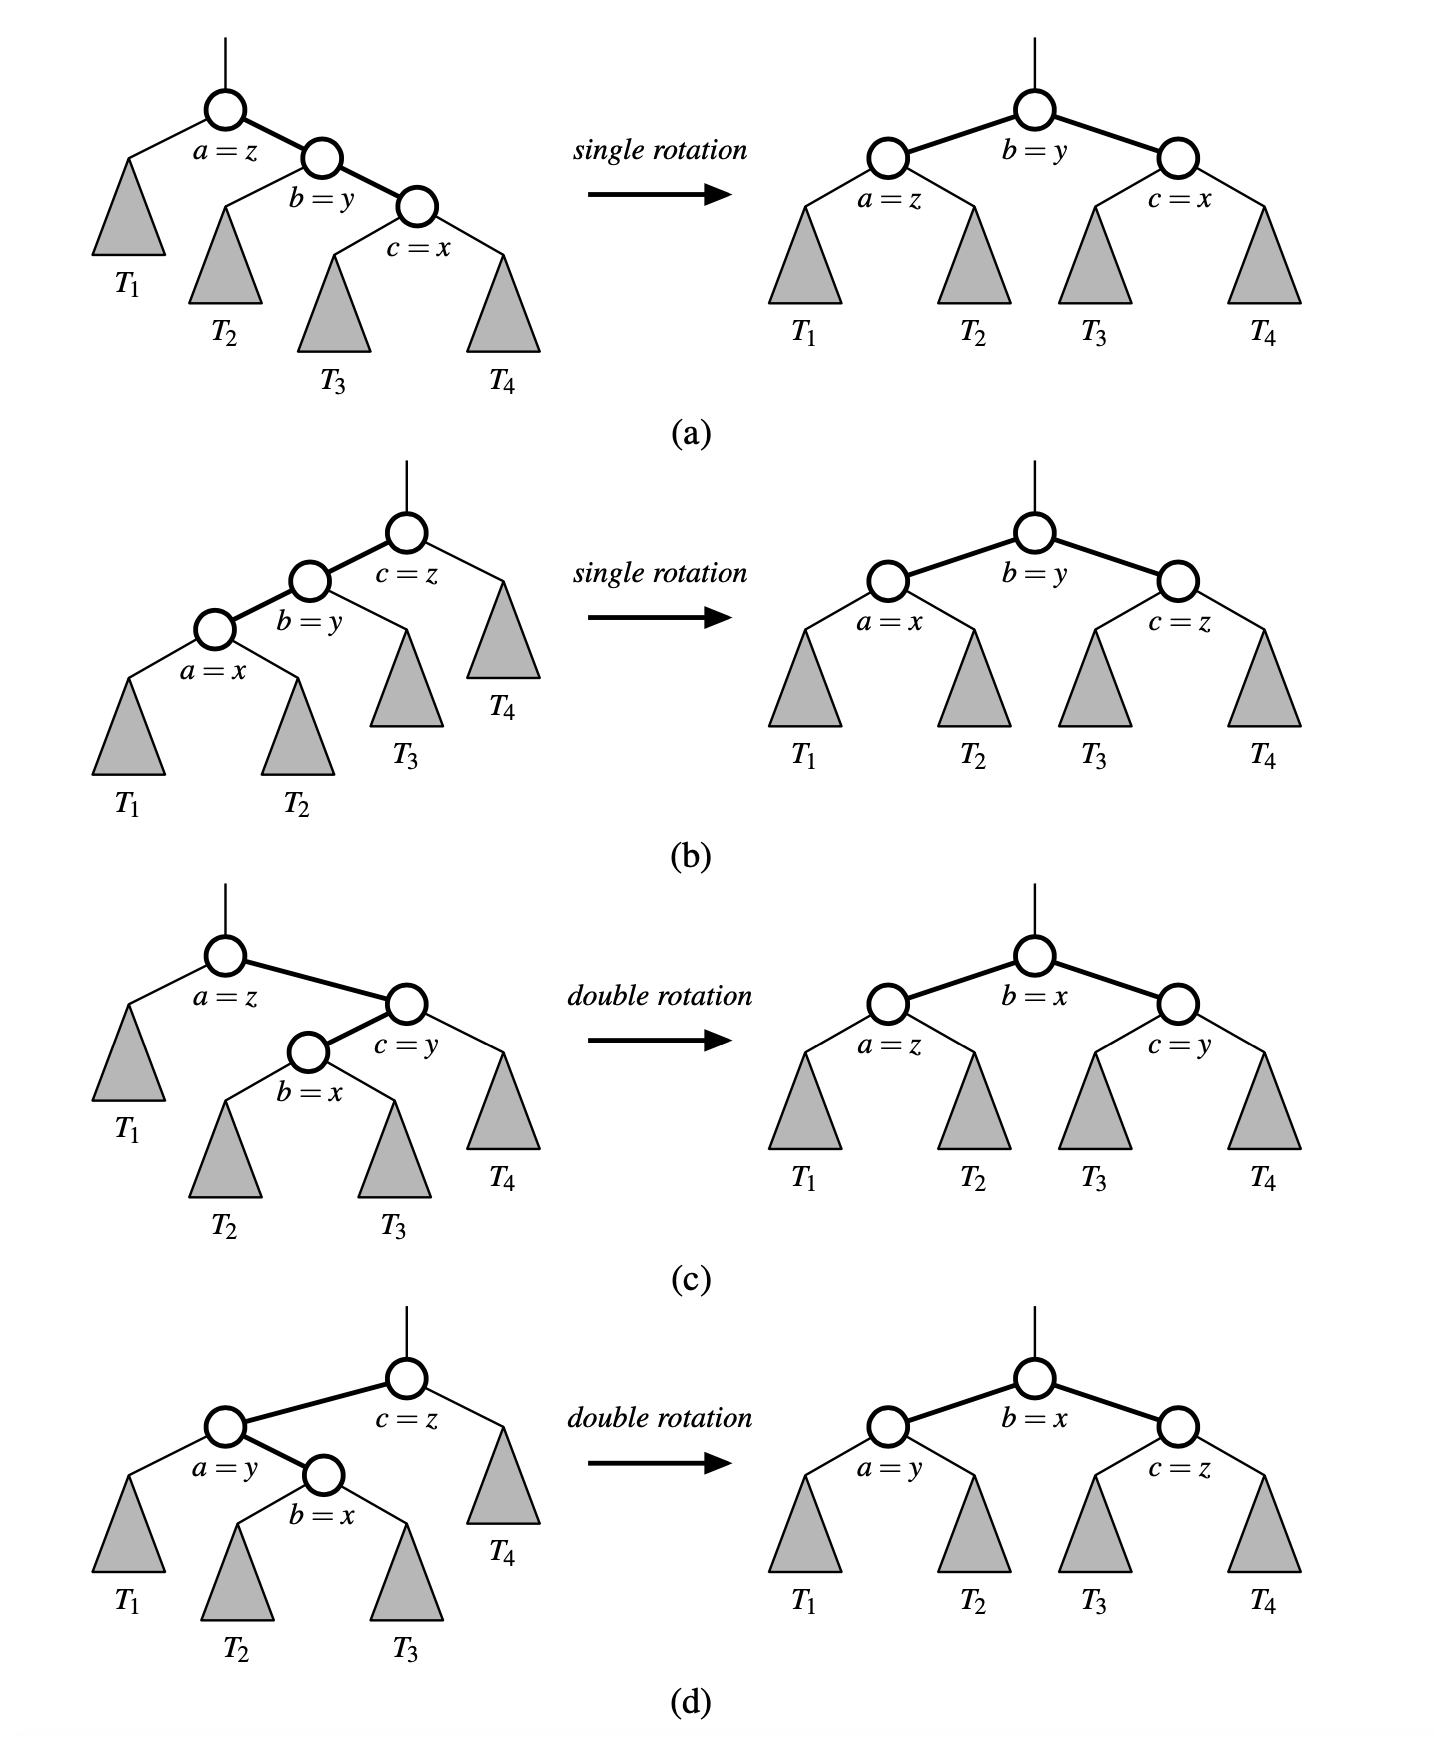

### 2.1 Python Framework for Balancing Searching Trees

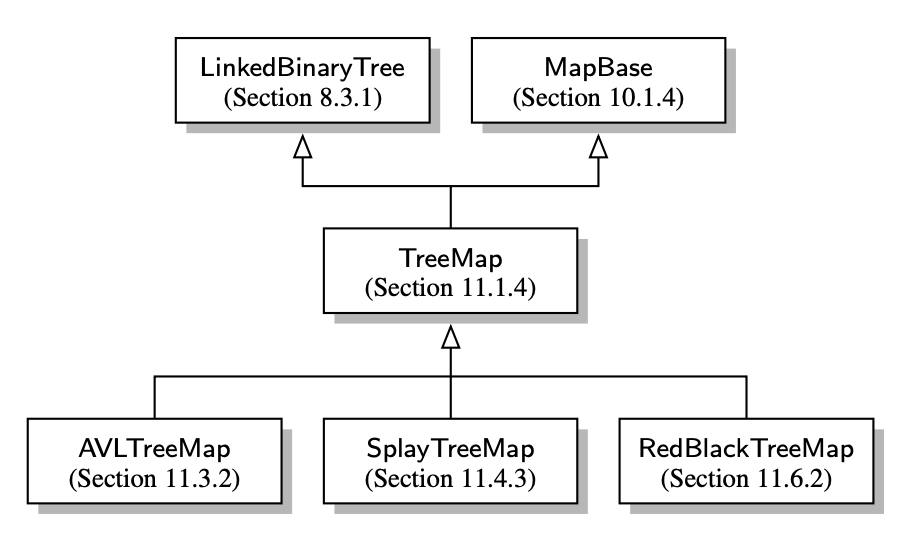

#### Hooks for Rebalancing Operations

1. _rebalance_insert(p)
    - made within the \__setitem__ method immediately after a new node is added to the tree at position p

2. _rebalance_delete(p)
    - made each time a node has been deleted from the tree
    - with position p identifying the parent of the node been removed
    - delete() method 
    - \__delitem__(k) actual invoked method

3. _rebalance_access(p)
    - called when an item at position p of a tree is accessed by \__getitem__ 
    - used by the SPLAY TREE so more frequently accessed items are brought closer to the root

#### Factory for Creating Tree Nodes
    - Provide a subclass the means to control the type of node that is created within methods of the parent class

1. The _Node class of TreeMap is provided within LinkedBinaryTree class.
2. The subclass of TreeMap will override the nested _Node class to provide storage for an additional field.

So We instantiate the node using the syntax self._Node rather than LinkedBinaryTree._Node.
    - So the instantiation follows the definition on the newly defined node class.
    




## 3. AVL Trees 平衡二叉树

Simple balancing strategy that guarantees worst-case logarithmic running time for all the fundamental map operations.

### Definition of an AVL Tree

The height of position p is the number of nodes on the longest path from p to a leaf.
    - A leaf position has height 1
    - The height of a null child is 0
    
#### Height-Balance Property

For every position p of T, the heights of the children of p differ by at most 1.

    - Any binary search tree T that satisfies the height-balance property is said to be an AVL tree.
    - A subtree of an AVL tree is itself an AVL tree

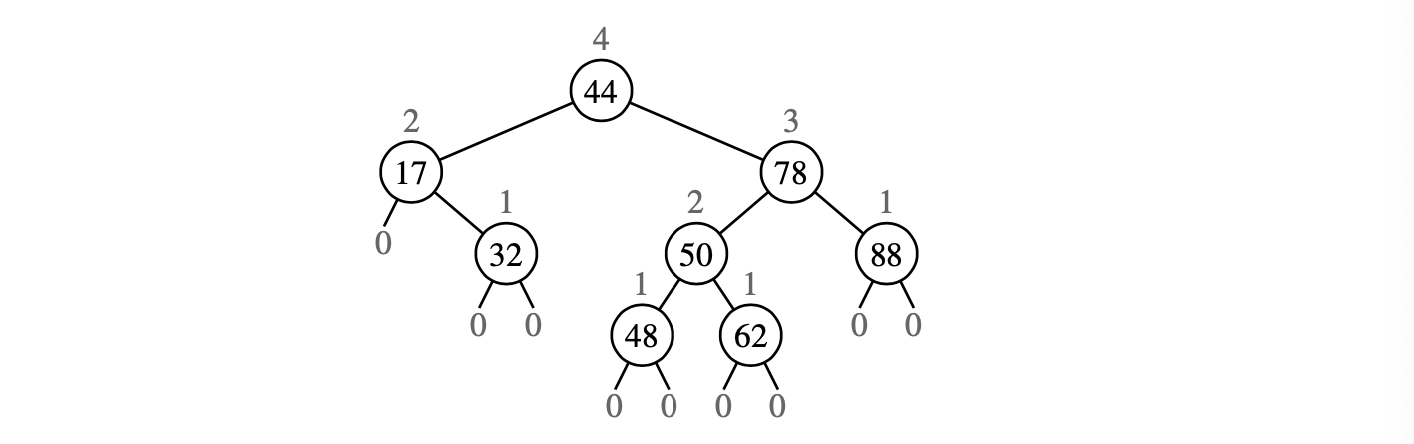


#### The height of an AVL tree storing n entries is O(logn)

$$n(1) = 1, n(2) = 2$$
<br>
对于height h >= 3的AVL Tree，当它含有最少的nodes时，左右两个子树必定分别为一个高度为（h-1）的含有最少的nodes的AVL Tree 和一个高度为（h-2）的含有最少的nodes的AVL Tree，即：
$$n(h) = 1 + n(h-1) + n(h-2)\;\;\text{for h >= 3}$$

同时可知n(h)是严格递增函数，可得：
$$n(h-1) > n(h-2)\;\;\text{-->} \;n(h) > 2*n(h-2)$$
<br>
$$n(h) > 2 * n(h-2) $$
$$n(h) > 4 * n(h-4) $$
$$n(h) > 8 * n(h-6) $$
$$n(h) > 2^i * n(h-2i) $$

选择整数i使（h-2i）= 1或2，则有
$$i = \lceil\frac{h}{2}\rceil - 1$$
所以可得：
$$n(h) > 2^{\lceil\frac{h}{2}\rceil - 1}* n(h-2*\lceil\frac{h}{2}\rceil + 2)$$
$$n(h) >= 2^{\lceil\frac{h}{2}\rceil - 1} * n(1) $$
$$n(h) >= 2^{\frac{h}{2}}$$
不等式两边取对数：
$$log(n(h)) > \frac{h}{2} - 1$$
$$h < 2log(n(h)) + 2$$

An AVL Tree storing n entries has height at most 2logn + 2

### 3.1 Update Operations

#### Balanced

A position is balanced if the absolute value of the difference between the heights of its children is at most 1.

The height-balance property in AVL trees is equivalent that every position is balanced.

#### Insertion

The insertion of a new node at a leaf position p, may violate the height-balance property.
    - The only positions that may become unbalanced are ancestors of p
    
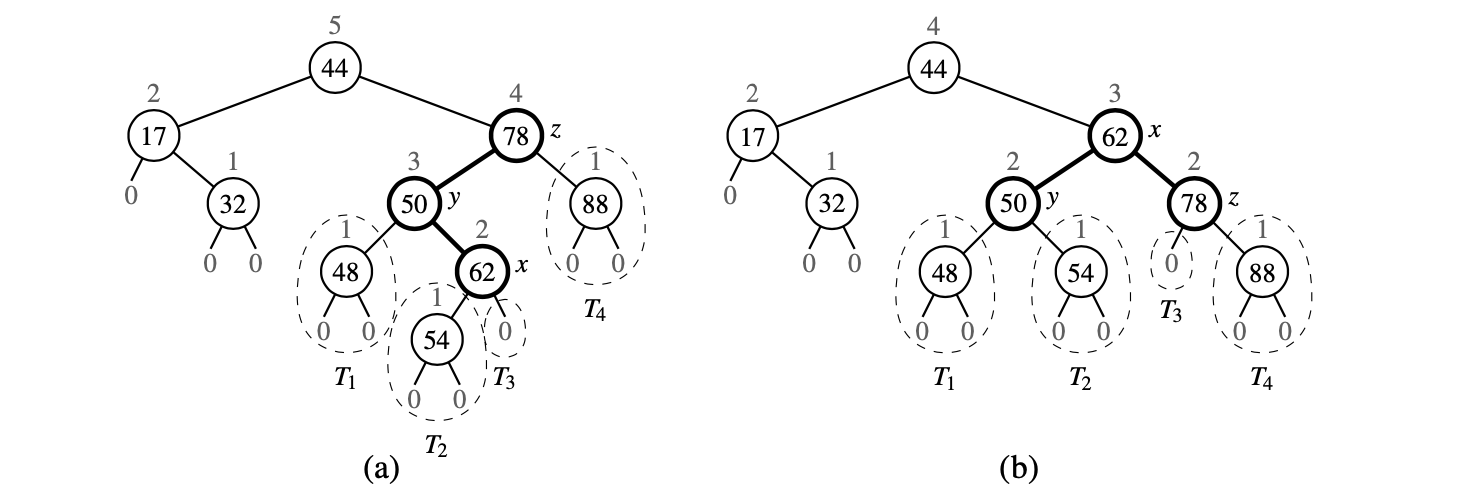
The insertion of node 54

Restore the balance:
1. z:
    - The first position from p toward the root that is unbalanced.
2. y:
    - The child of z with higher-height
3. x:
    - The child of y with higher-height
    - Could be p itself
4. rebalance the subtree rooted at z by 
    - restructure(x)
    
<font color='red'>Globally</font>
    - after restructuring,any ancestor of z becomes balanced again.

#### Deletion

After deletion a node, there can be **at most one** node that is unbalanced.
    - On the path from p to the root
    
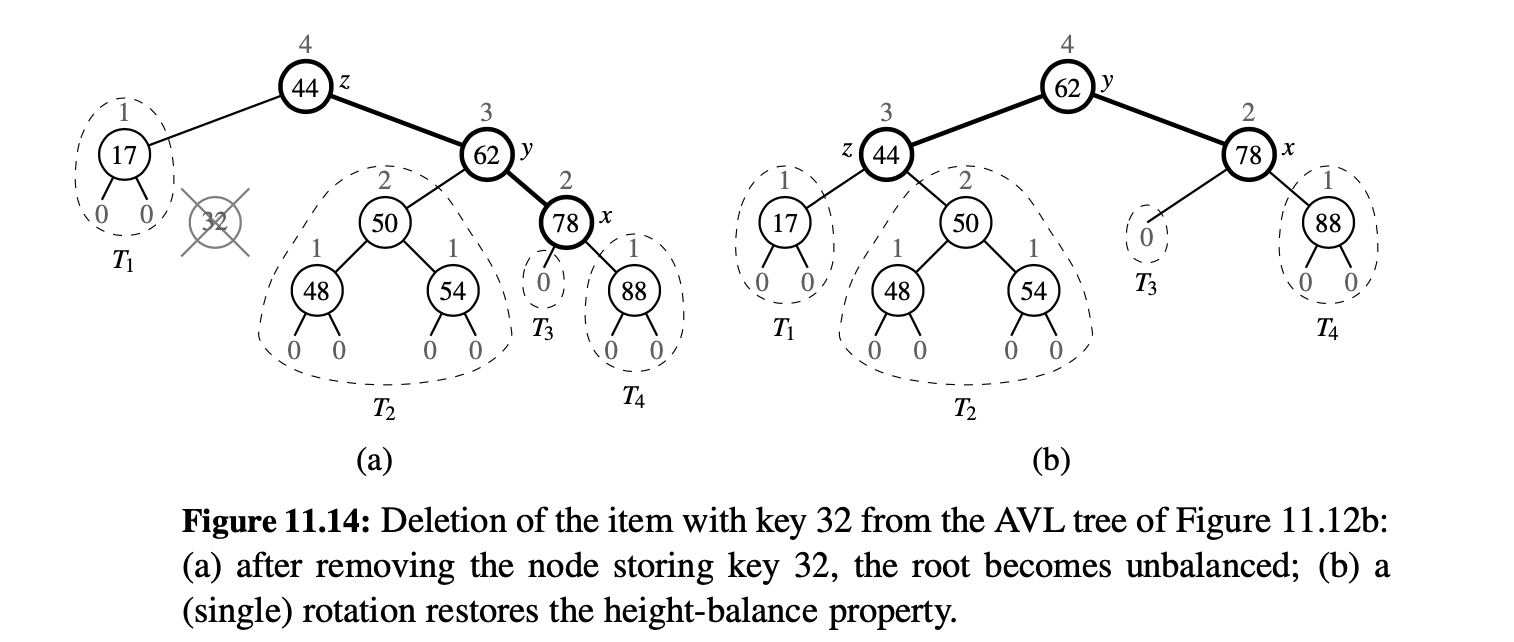

Restore the balance:

1. z:
    - The first position from p toward the root that is unbalanced.
2. y:
    - The child of z with higher-height
3. x:
    - The child of y with higher-height
    - If child has equal-height:
        - y是z的左子树，则x是y的左子树
        - y是z的右子树，则x是y的右子树
4. rebalance the subtree rooted at middle position b by 
    - restructure(x)
    
<font color='red'>Locally</font>
    - the restructuring only guaranteed the subtree b is balanced
    - The restructuring may reduce the height of the subtree, which may cause an ancestor of b to become unbalanced
    - Continue walking up T looking for unbalanced positions, all the way to the root.

#### Performance of AVL Trees

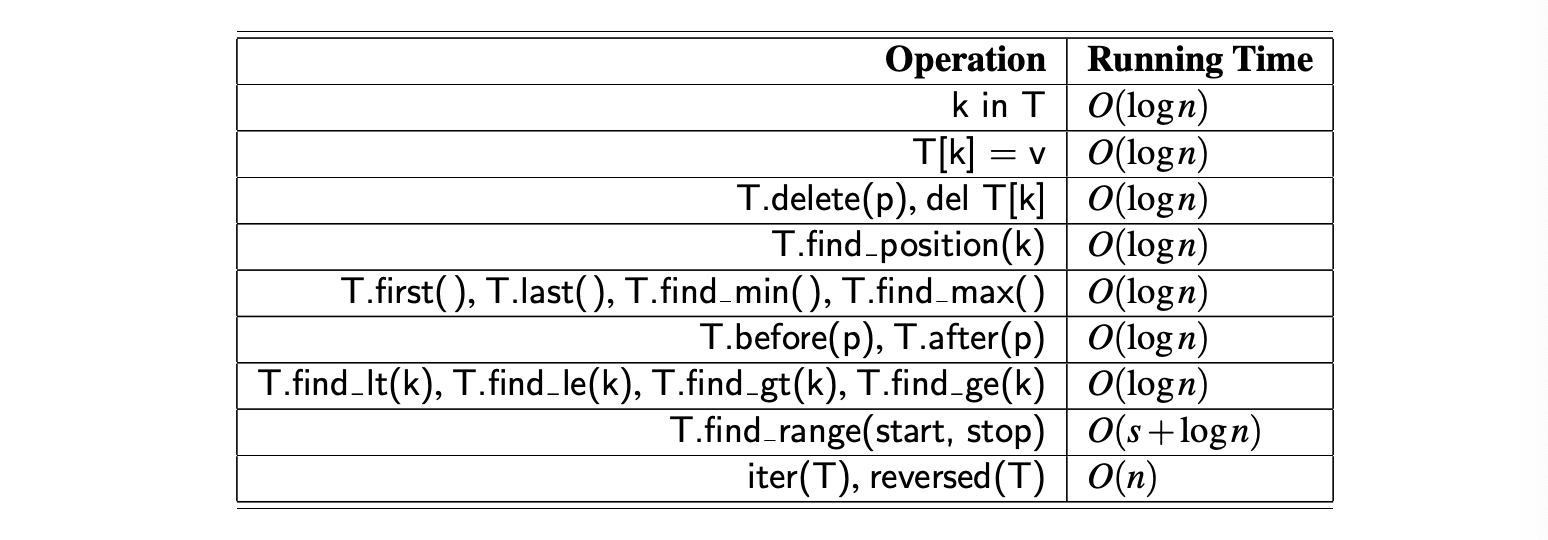

### 3.2 Python Implementation

Stop Rebalance Process
    - If reach an ancestor with height that is unchanged by the overall map operation
    - Or if after perform a trinode restructuring that results in the subtree having the same height it had before the map operation

In [2]:
class AVLTreeMap(TreeMap):
    '''
    Sorted map implementation using an AVL tree
    '''
    
    #------------------------nested _Node class------------------------
    class _Node(TreeMap._Node):
        '''
        Maintains height for balancing
        '''
        __slots__ = '_height'
        
        def __init__(self, element, parent = None, left = None, right = None):
            super().__init__(element, parent, left, right)
            self._height = 0
            
        def left_height(self):
            return self._left._height if self._left is not None else 0
        
        def right_height(self):
            return self._right._height if self._right is not None else 0
        
    #-----------------------positional-based utility methods------------
    
    def _recompute_height(self,p):
        p._node._height = 1 + max(p._node.left_height(), p._node.right_height())
        
    def _isbalanced(self,p):
        return abs(p._node.left_height() - p._node.right_height()) <= 1
    
    def _tall_child(self, p, favorleft = False):
        if p._node.left_height() + (1 if favorleft else 0) > p._node.right_height():
            return self.left(p)
        else:
            return self.right(p)
        
    def _tall_grandchild(self, p):
        child = self._tall_child(p)
        # if child is on left, favor left grandchild
        # else favor right grandchild
        alignment = (child == self.left(p))
        return self._tall_child(child, alignment)
    
    def _rebalance(self, p):
        while p is not None:
            old_height = p._node._height
            if not self._isbalanced(p):
                # perform trinode restructuring, setting p to resulting root
                # and recompute new local heights after the restructuring
                p = self._restructure(self._tall_grandchild(p))
                self._recompute_height(self.left(p))
                self._recompute_height(self.right(p))
            self._recompute_height(p)
            if p._node._height == old_height:
                # no further changes needed
                p = None
            else:
                p = self.parent(p)
                
    #-----------------------override balancing hooks-------------------
    def _rebalance_insert(self,p):
        self._rebalance(p)
        
    def _rebalance_delete(self,p):
        self._rebalance(p)

## 4. Splay Trees

A Splay Tree:
1. Does not strictly enforce a logarithmic upper bound on the height
2. No additional height, balance, or other auxiliary data associated with the nodes of the tree
3. Move-to-root operation:
    - splaying
    - performed at the bottommost position p reached during every insertion, deletion, or a search
    - Make more frequently accessed elements to remain nearer to the root
    - Guarantee a logarithmic amortized running time for insertions, deletions, and searches.
    
### 4.1 Splaying

Splay x by moving x to the root of T through a sequence of restructurings.

Involving x, its parent y, its grandparent z.

1. zig-zig:
    - x,y,z 同向
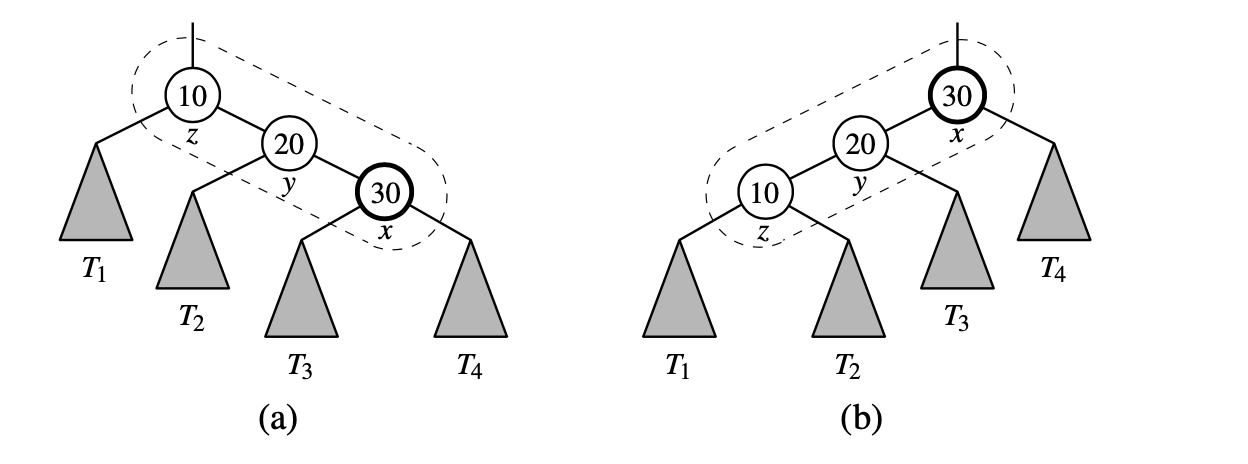

2. zig-zag:
    - x,y,z 不同向
    
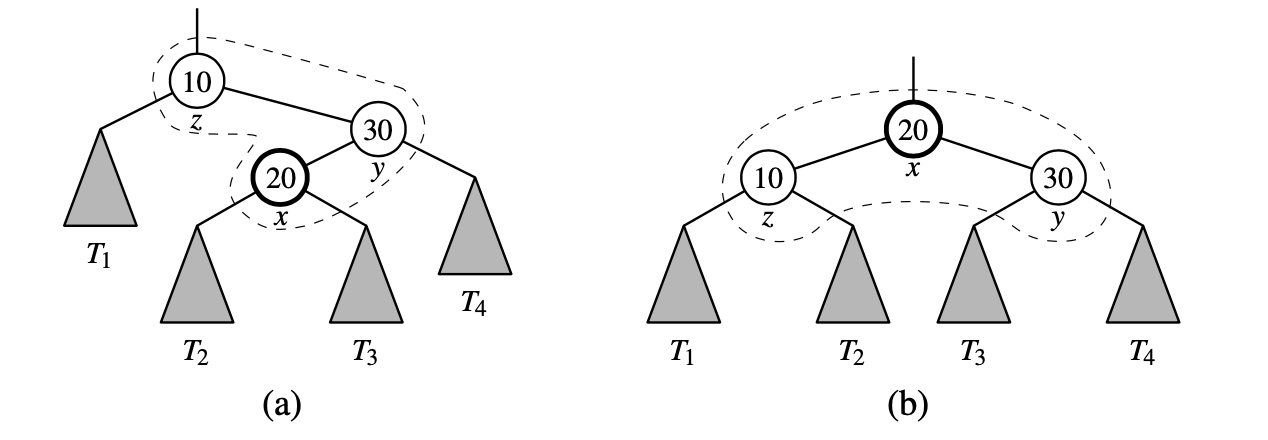

3. zig:
    - x 没有grandparent z
    
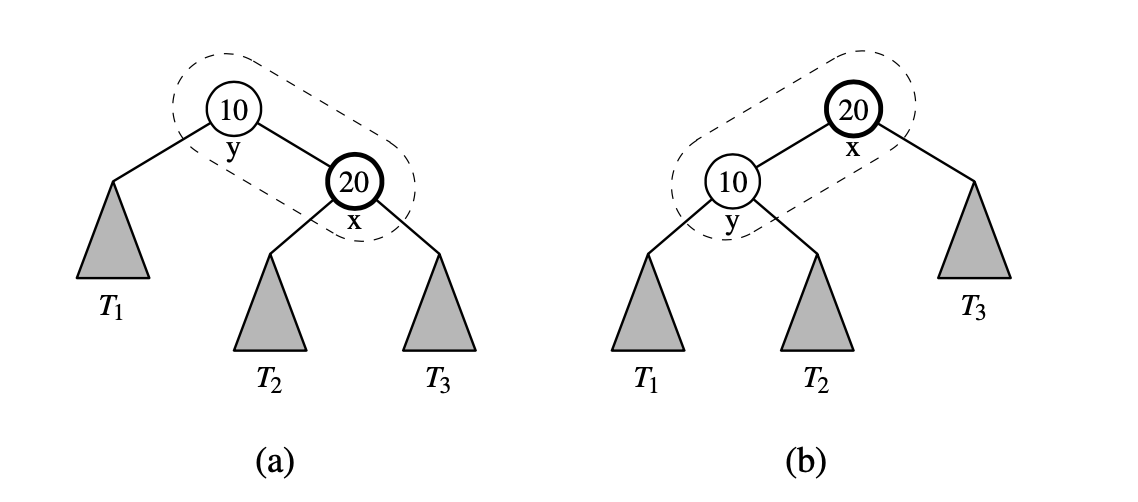

**Example:**
    - Splaying a node with key 14
    
a. zig-zag
c. zig-zig
e. zig-zig
    
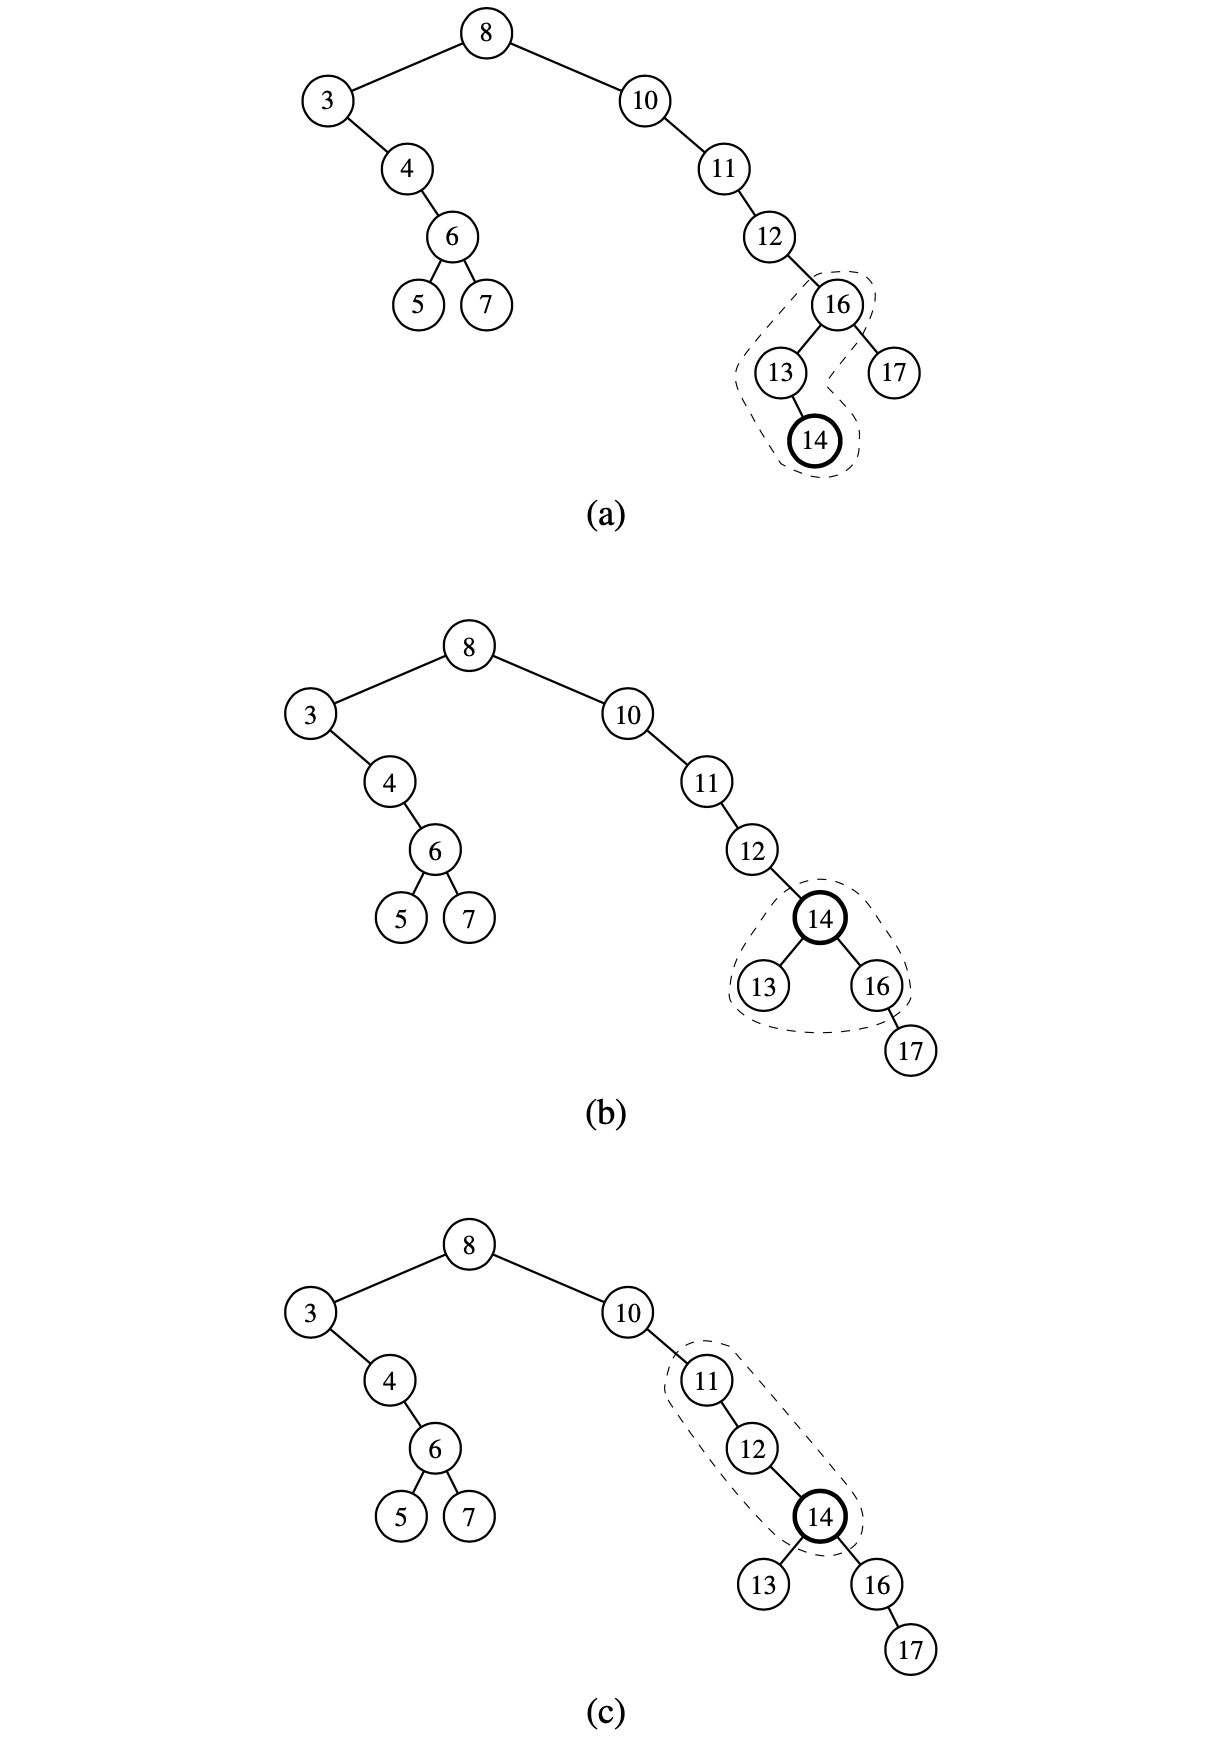

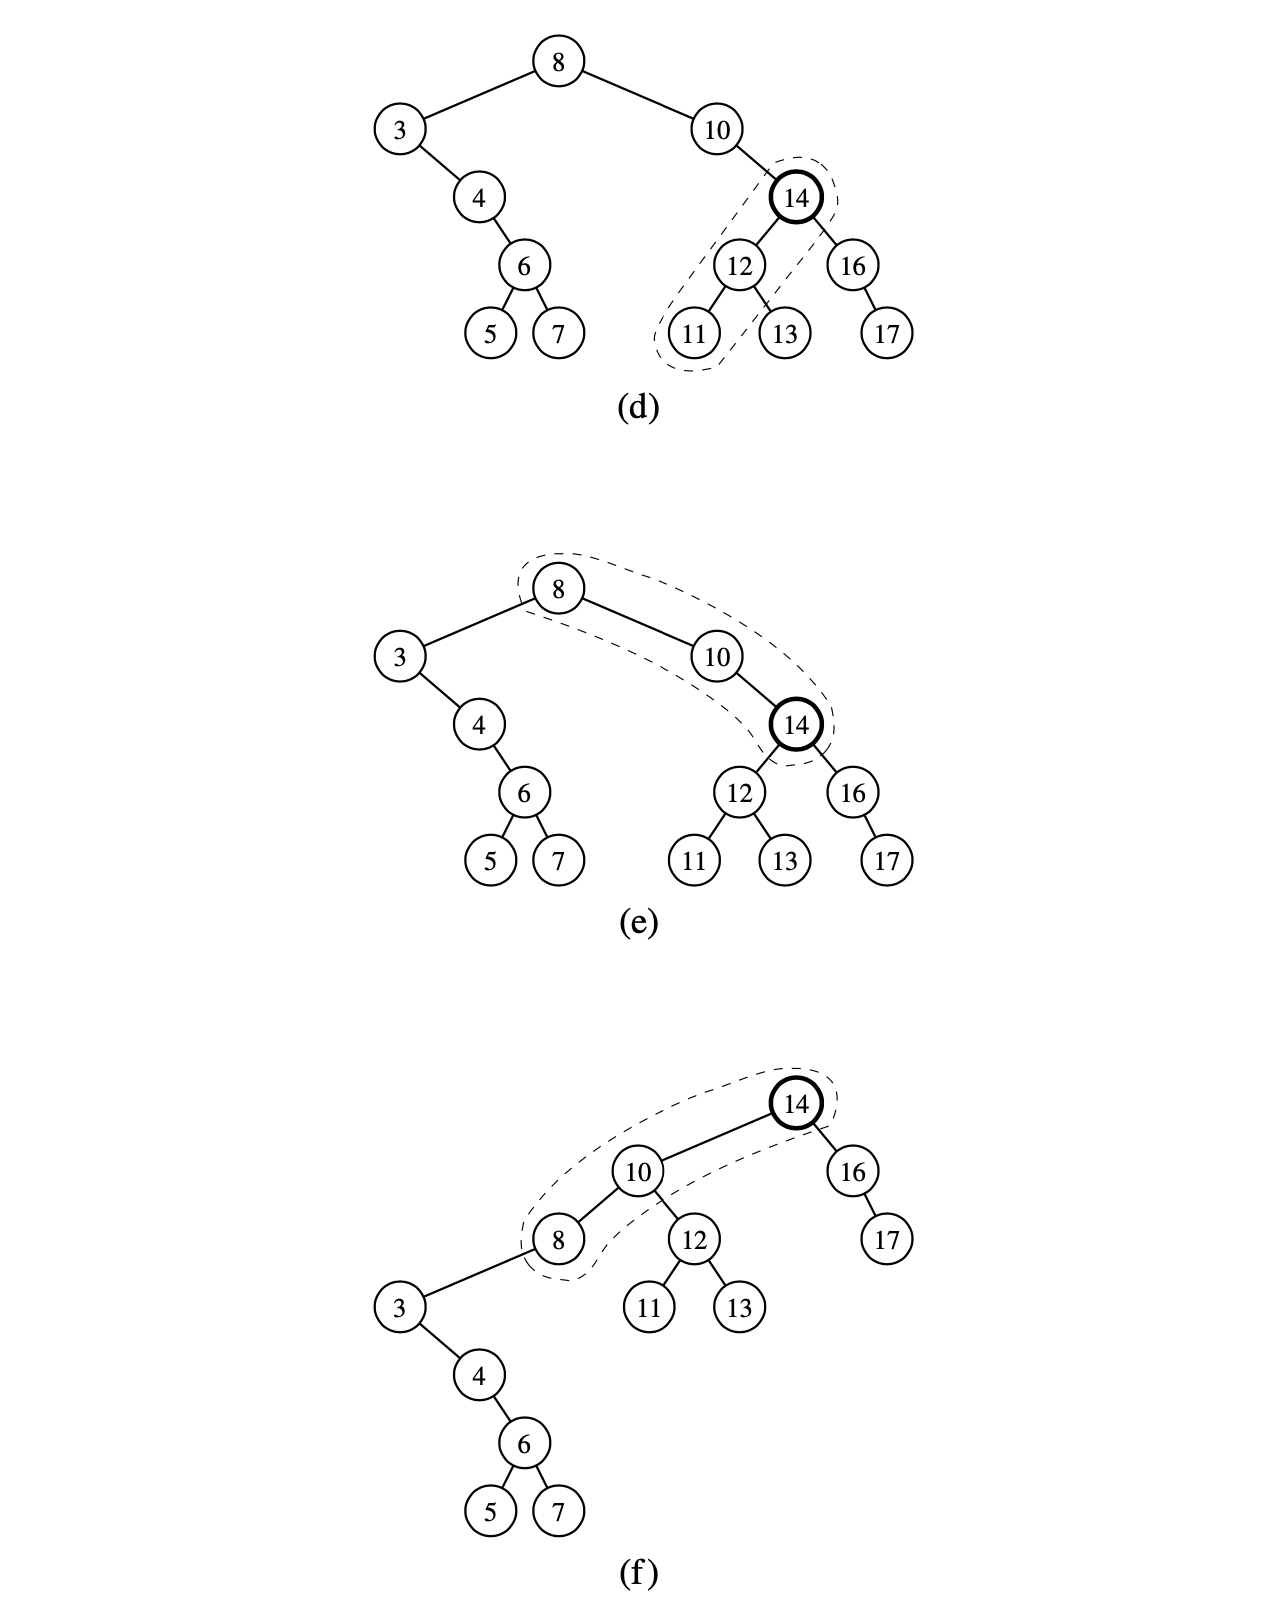

### 4.2 When to Splay

1. Searching for key k:
    - If k is found at position p, splay p
    - Or splay the leaf position at which the search terminates unsuccessfully.
2. Inserting key k
    - Splay the newly created internal node where k gets inserted.
3. Deleting a key k
    - Splay the position p that is the parent of the removed node.
    - A removed node may be that originally containing k, or a descendant node with a replacement key.
    
Delete k 8, will remove the node with k = 7

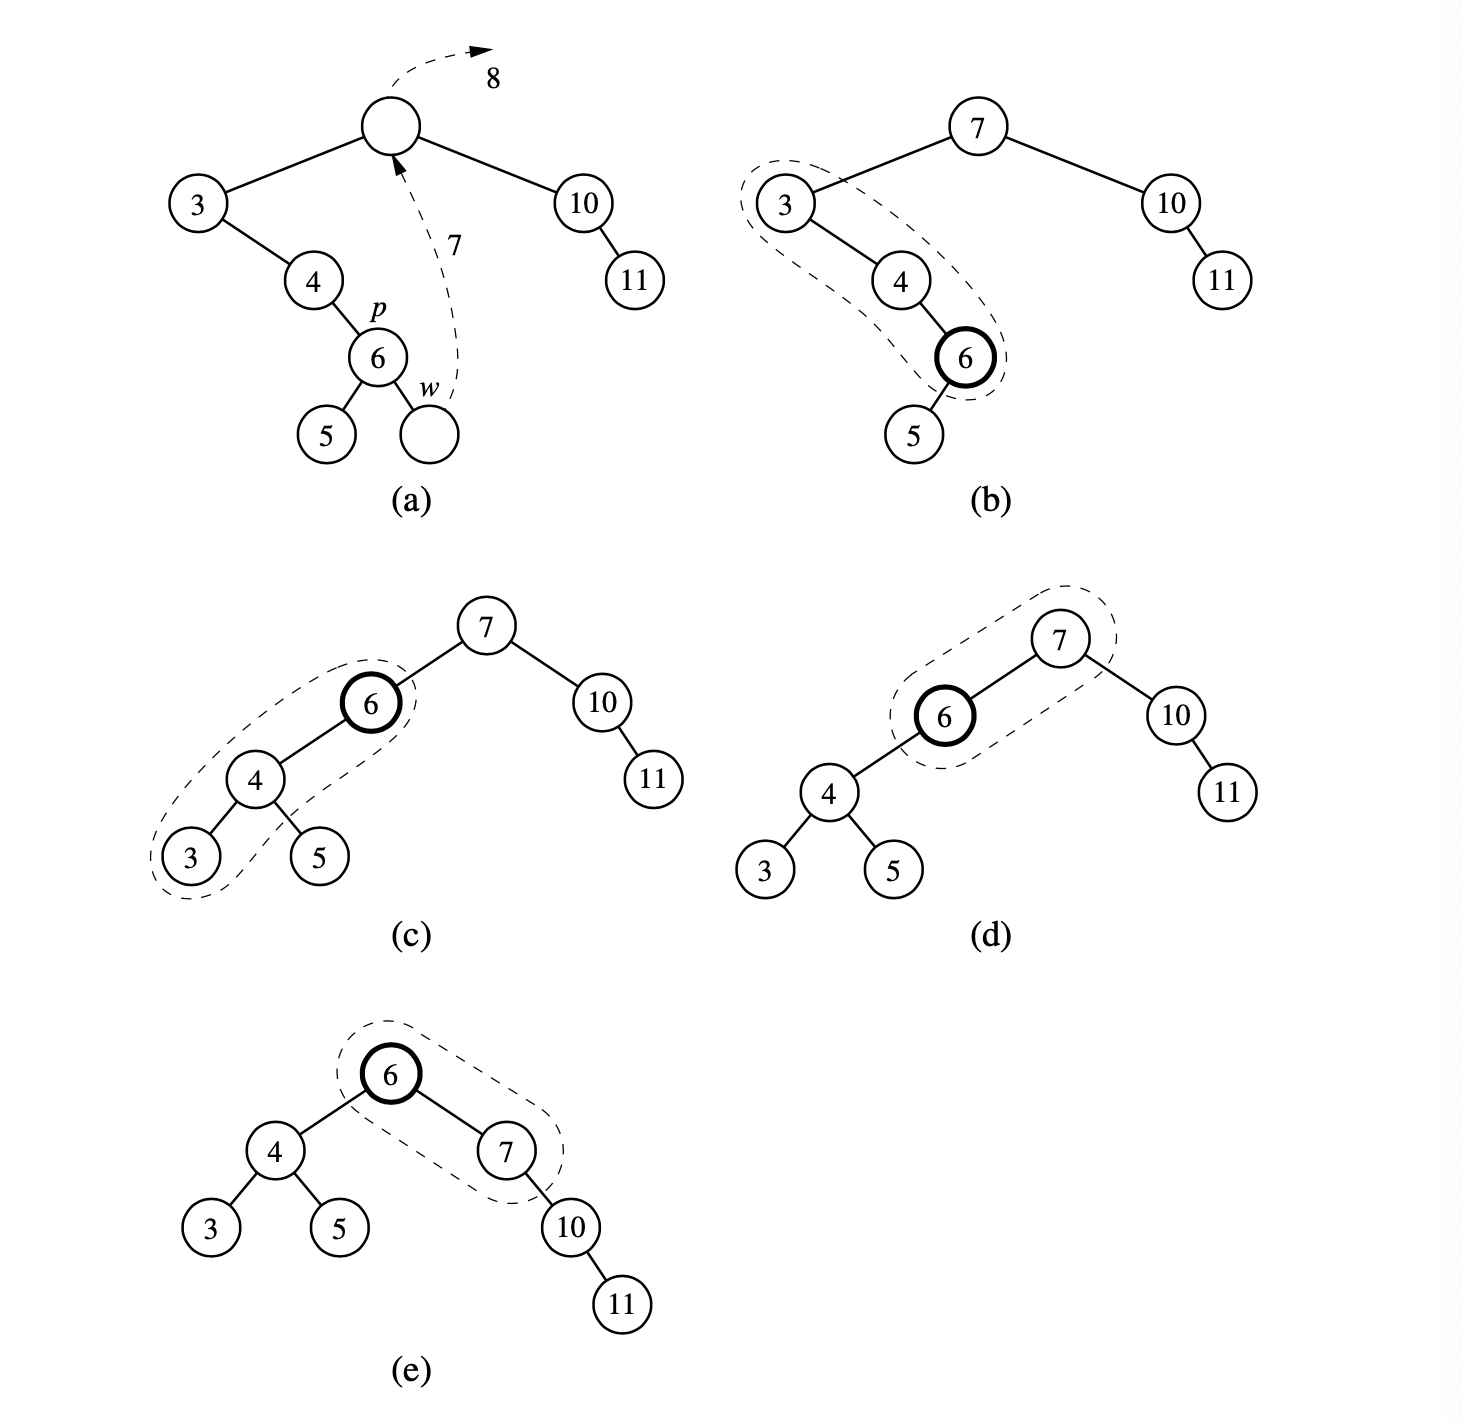

### 4.3 Python Implementation

In [3]:
class SplayTreeMap(TreeMap):
    '''
    Sorted map implementation using a splay tree
    '''
    #-----------------splay operation----------------------------------
    def _splay(self, p):
        while p != self.root():
            parent = self.parent(p)
            grand = self.parent(parent)
            if grand is None:
                # zig case
                self._rotate(p)
            elif (parent == self.left(grand)) == (p == self.left(parent)):
                # zig-zig case
                self._rotate(parent)
                self._rotate(p)
            else:
                # zig-zag case
                self._rotate(p)
                self._rotate(p)
                
    #----------------override balancing hooks---------------------------
    def _rebalance_insert(self, p):
        self._splay(p)
        
    def _rebalance_delete(self, p):
        if p is not None:
            self._splay(p)
            
    def _rebalance_access(self, p):
        self._splay(p)

### 4.4 Amortized Analysis of Splaying

## 5. (2,4) Trees also called 2-3-4 tree

A particular example of a more general structure known as a multiway search tree.
    - In which internal nodes may have more than two children.
    
A (2,4) Tree:
    - Each internal nodes may have 2, 3, 4 childrens
    
### 5.1 Multiway Search Trees

#### Definition of a Multiway Search Tree

d-node:
    - w is a d-node if w has d children
    
1. Each internal node of T has at least two children.
    - Each internal node is a d-node that d >= 2
    
    
2. Each internal d-node w of T with children c1,...cd stores an ordered set of d-1 key-value pairs
    - (k1,v1), ..., ($k_{d-1}$, $v_{d-1}$)
    - where k1 <= ... <= $k_{d-1}$
    
    
3. Define $k_0 = -\infty$ and $k_d = +\infty$
    - For each item (k,v) stored at a node in the subtree of w rooted at $c_i$, i = 1, ..., d, we have $k_{i-1} <= k <= k_i$ 
    
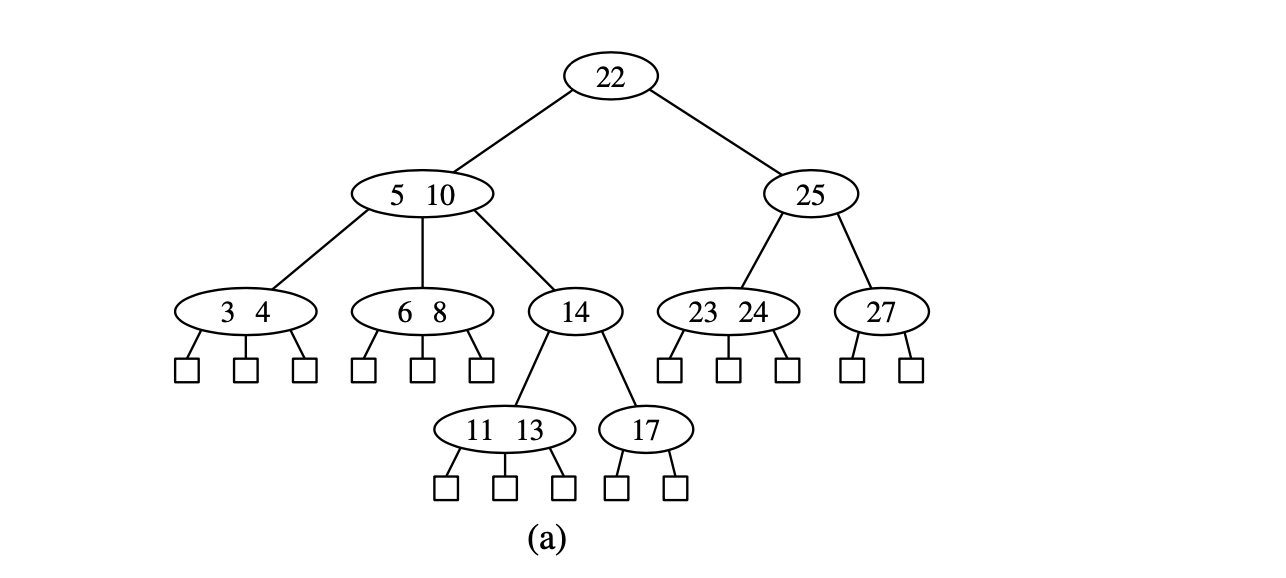

2-nodes：
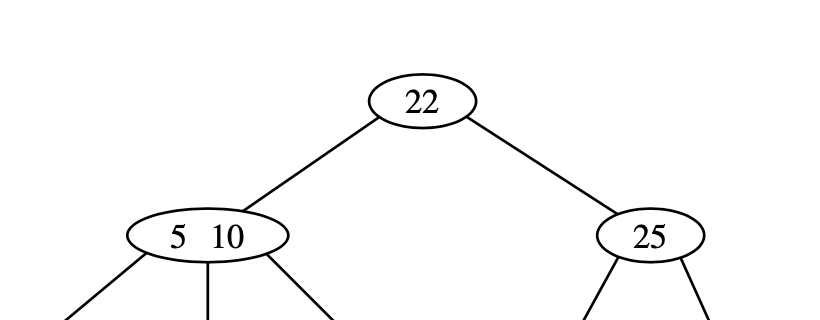

22
    - 有两个触手，能指向不同的两个子元素
    - 左边的子元素小于22，右边的子元素大于22
    

3-nodes:
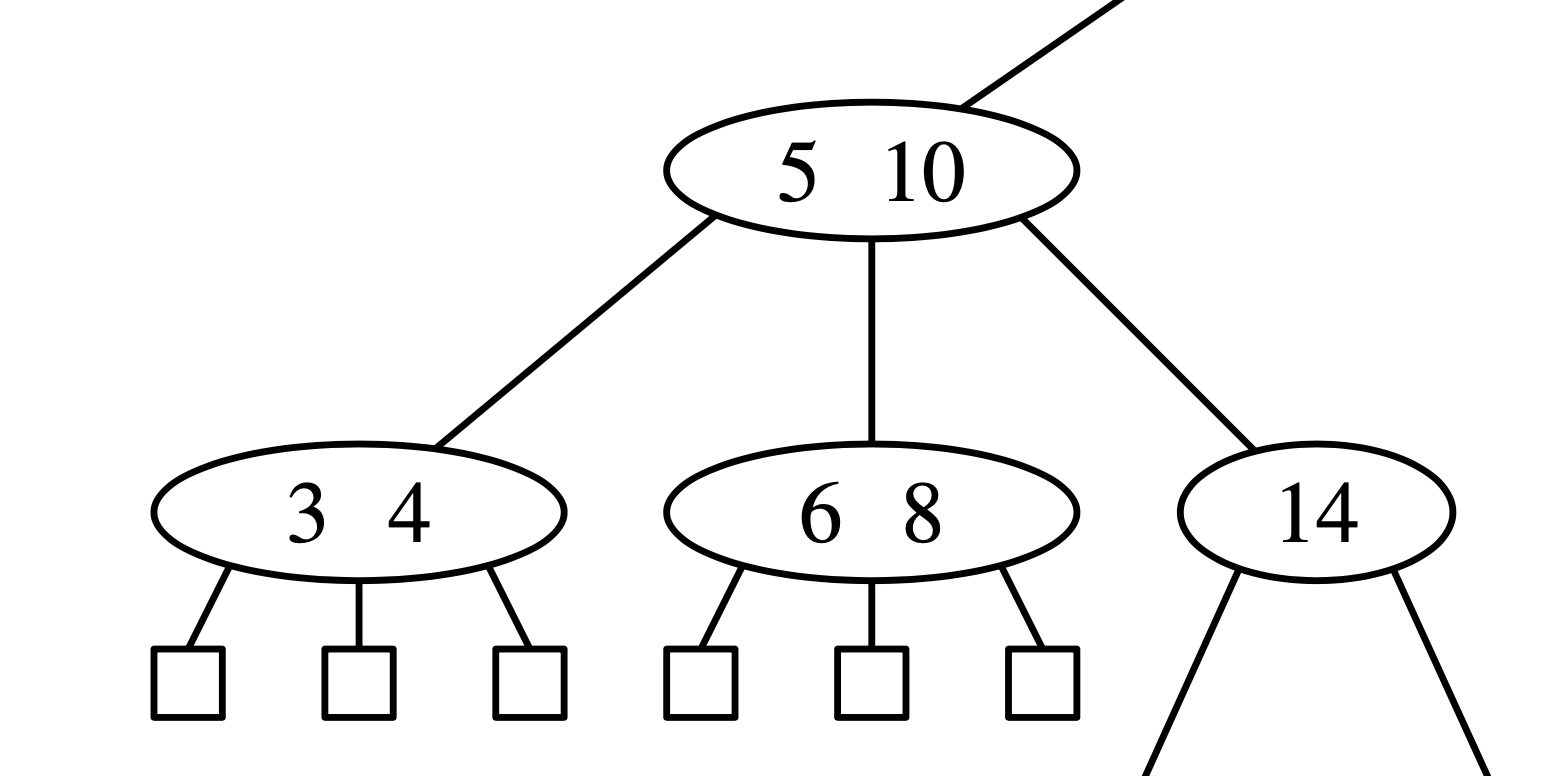

5 10
    - 有三个触手
    - 最左边的小于5，中间的在5-10之间，最右边的大于10

#### Data Structures for Representing Multiway Search Trees

During a search for key k in a multiway search tree, the primary operation needed when navigating a node is 

    finding the smallest key at that node that is greater than or equal to k
    
*Primary* data structure:
    - multiway search tree
*Secondary* data structure:
    - Sorted map
    - Allow use of find_ge(k) method
    
#### Performance:

$d_{max}$:
    
    denote the maximum number of children of any node of T

h:
    The height of T

1. Searching for an item of T with key k can be performed within a node in O(log$d_{max}$)
2. The search time in a multiway search tree is O(h * log$d_{max}$)
3. When $d_{max}$ is constant, O(h)

### 5.2 (2,4)-Tree Operations

A multiway search tree:
    - keeps the secondary data structure stored at each node small
    - keeps the primary multiway tree balanced
is called a (2,4) tree

#### Size Property:
    - Every internal node has at most four children
#### Depth Property:
    - All the external nodes have the same depth
    
The (2,4) tree is maintaining by the two above property
    
<br><br>
**(2,4)树的特点:**

1. An n-item multiway search tree has n+1 external nodes

2. The height of a (2,4) tree storing n item is O(logn)

证明：

The number of external nodes in T is at most $4^h$, at least $2^h$
<br>
So we have:
$$2^h <= n + 1 <= 4^h$$
$$\frac{1}{2}log(n+1) <= h <= log(n+1)$$

#### Insertion

Split operation with overflow:

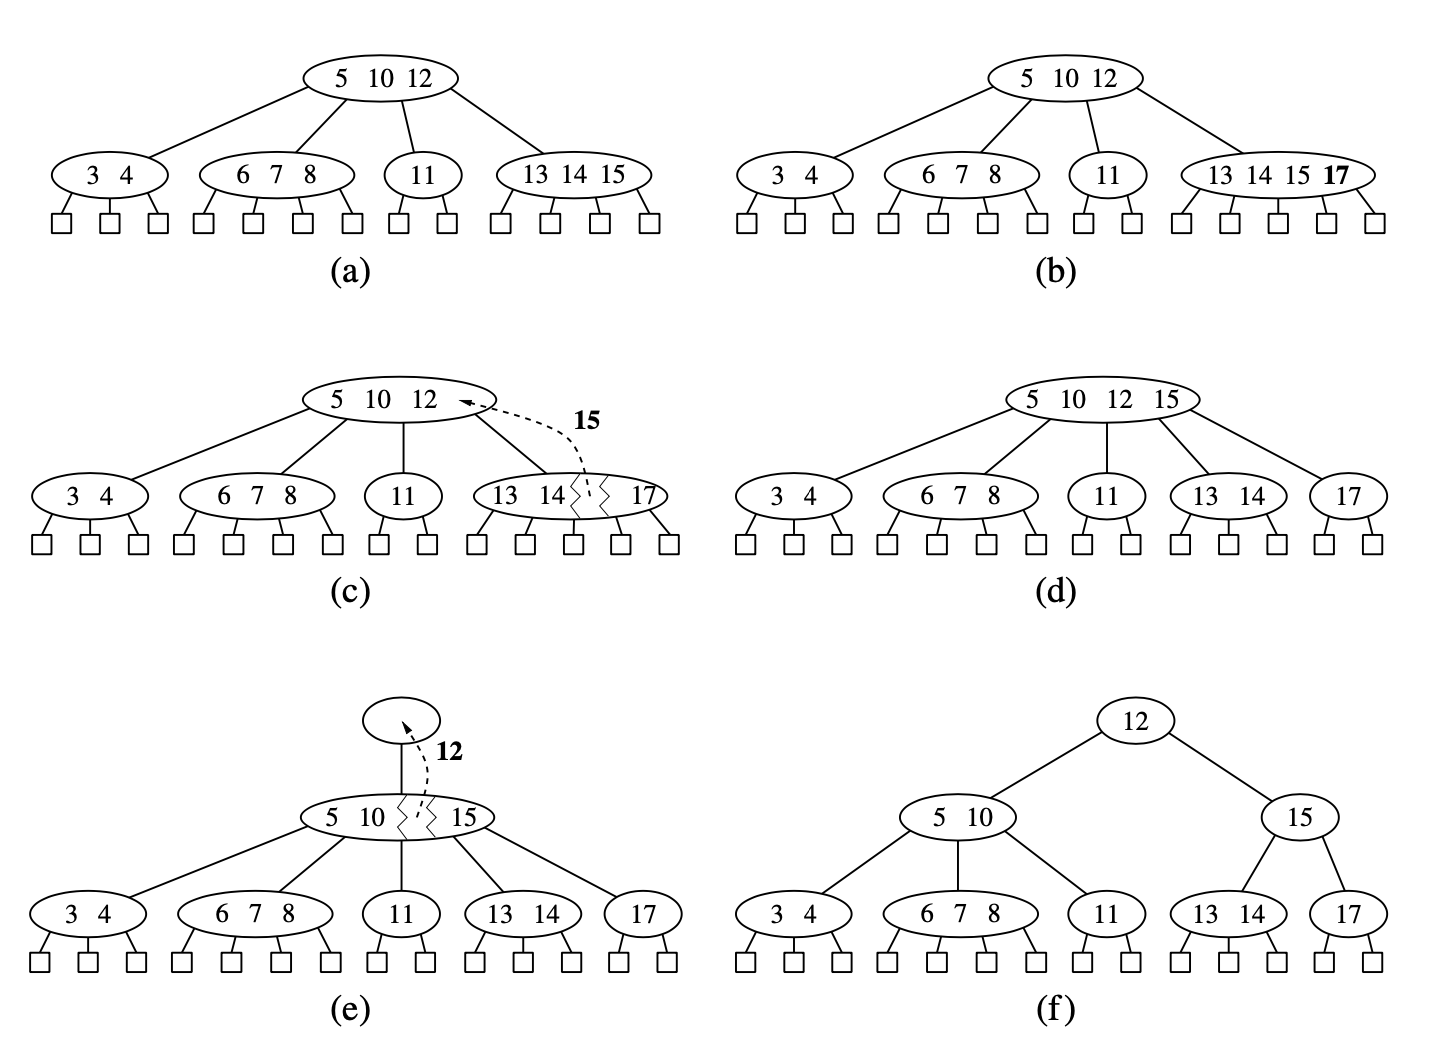

Analysis:

Search for the placement of new key k:
    - O(1) at each level since 4-node at most
    - O(logn) time overall
Split operation:
    - Single split O(1)
    - O(logn) in worst-cast
Total time:
    - O(logn)

#### Deletion

1. Remove item from a node which children are external node
    - Simply remove the item and its related external node
    
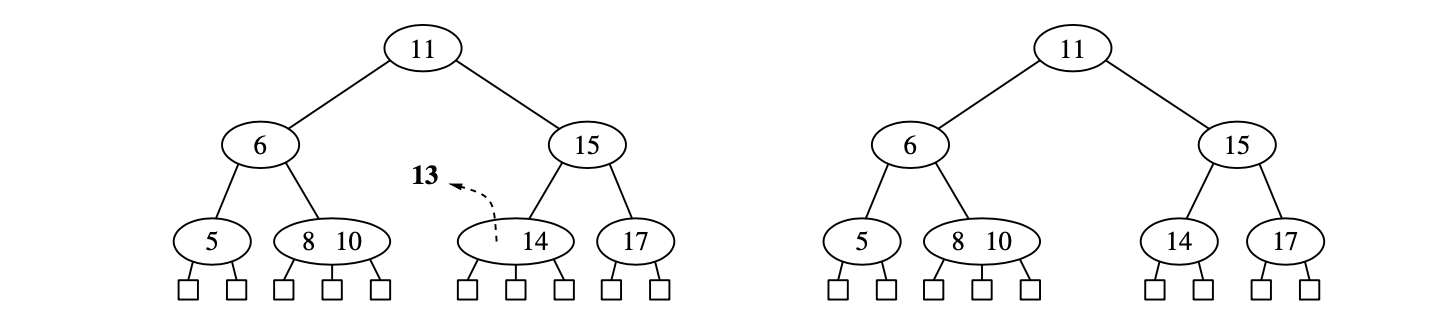


2. Remove item from a internal node
    - 所有的remove operation都可以转换为remove item from a node which children are external nodes的情况
    - 从node中移除第i的item，则从node的第i个children subtree中找到最右边的元素与要移除的item互换，然后删除互换后的item
    
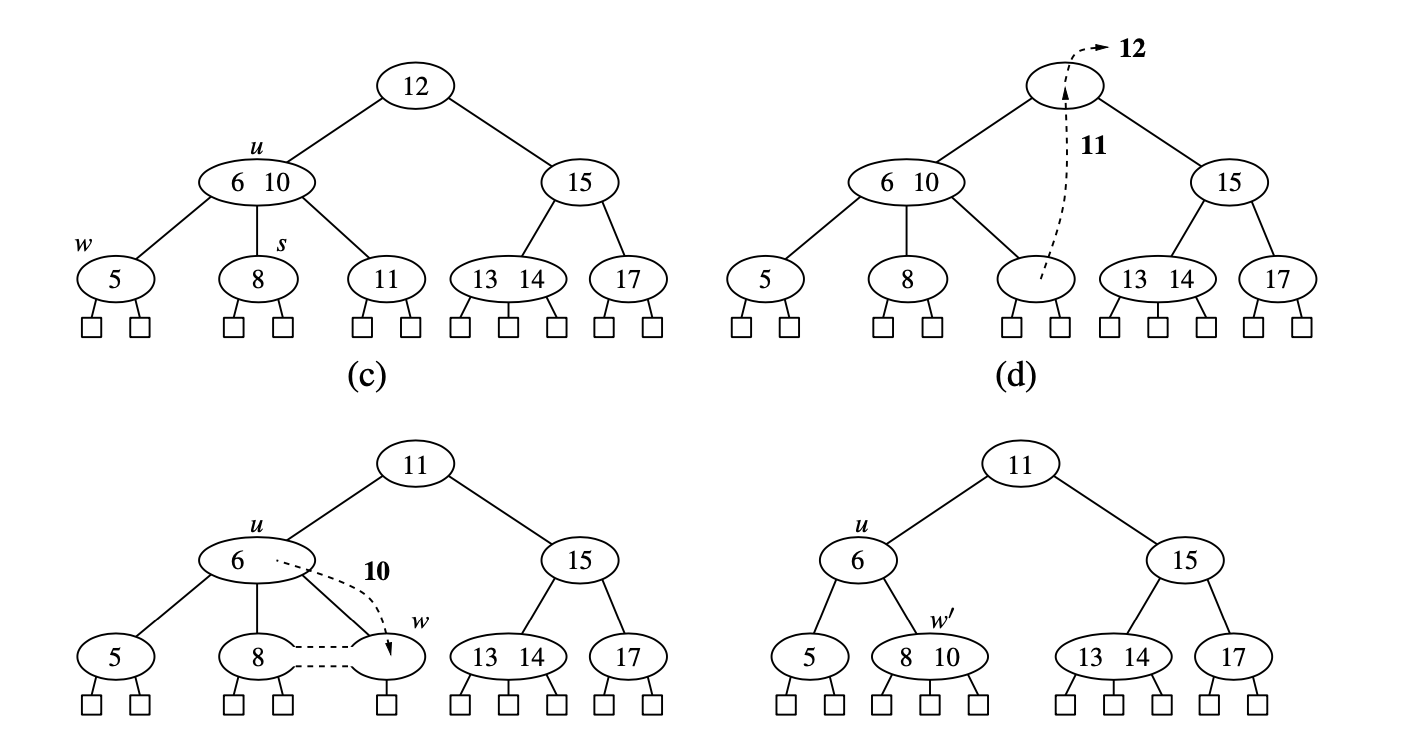

3. Transfer：
    - Underflow：如果待移除的node中的元素小于2个，则移除后违背2-4树的规则
    - When remove causing an underflow，并且待移除的node有一个3-node或4-node作为它的immediate sibling
    - 从sibling中移动一个child到待移除的node，移动一个key到它们的parent，并从parent中移动一个key到待移除的node
    - 如下图，s是w的3-node sibling，从s中移动key 6 到parent u， 从s中移动一个external child到w，并从u中移动key 5到w

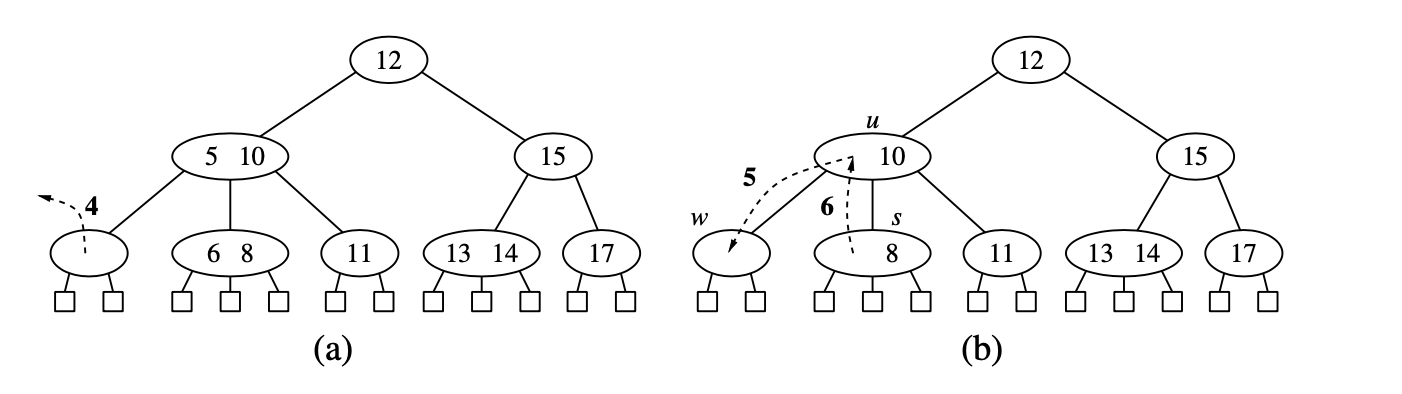

4. Fusion：
    - When remove causing an underflow，并且待移除的node没有合适transfer的immediate sibling
    - merge 待移除的node和它的sibling，产生一个新node，并从parent中移动一个key到这个新node
    - 有可能会导致parent node的fusion或transfer操作
    - 如下图，parent u要进行下一步的fusion操作

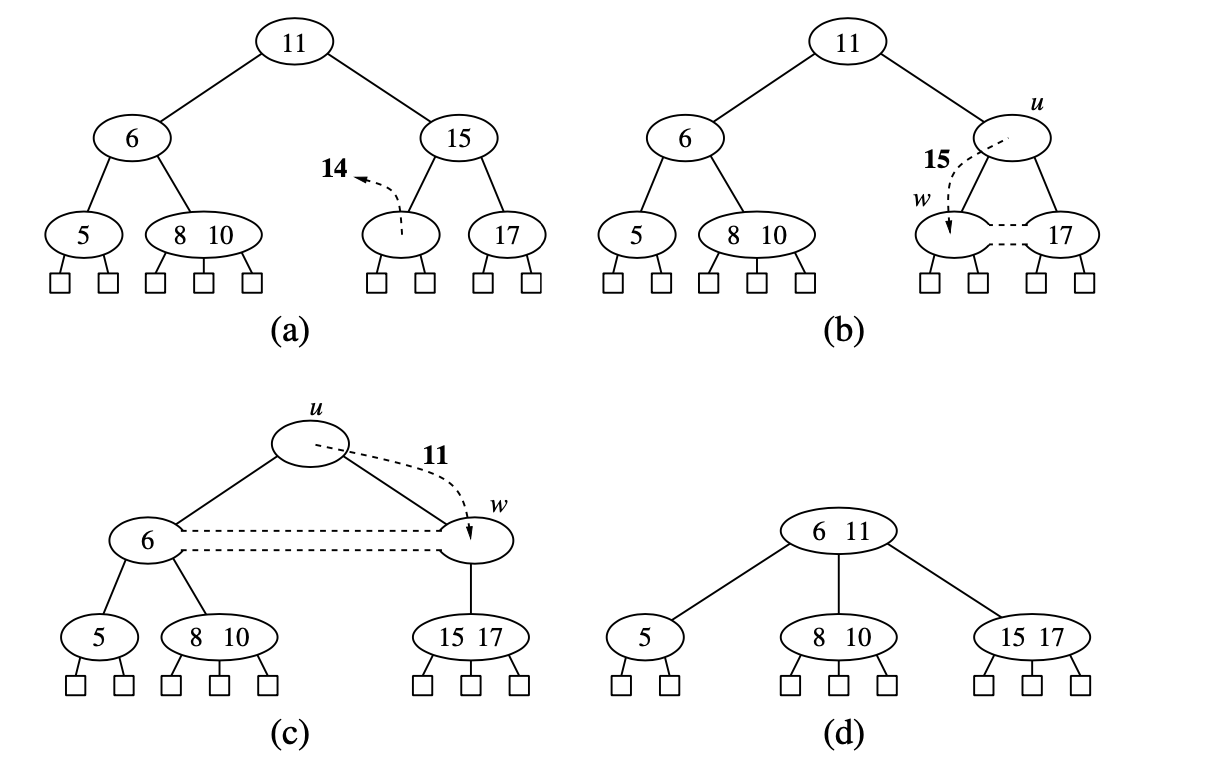


#### Performance of (2,4) Trees

- The height is O(logn)
- A split, transfer, or fusion operation takes O(1) time
- A search, insertion, or removal of an entry visits O(logn) nodes

## 6. Red-Black Trees

To maintain balanced:
1. AVL trees:
    - Require rotations after a deletion
2. (2,4) trees:
    - Require split or fusion after insertion or removal
3. Red-black tree:
    - Only O(1) structural changes after an update
    
#### A red-black tree:
1. A binary search tree with nodes colored red or black
2. The root is black
3. All external nodes are black Null
4. The children of a red node(if any) are black
5. All nodes with zero or one children have the same **black depth**
    - black depth: the number of black ancestors, a node is its own ancestor
    - 即：任意节点到每个叶子结点的所有路径包含相同数量的黑色节点
    - 可推出：如果一个节点存在黑色子节点，那么该节点肯定有两个子节点

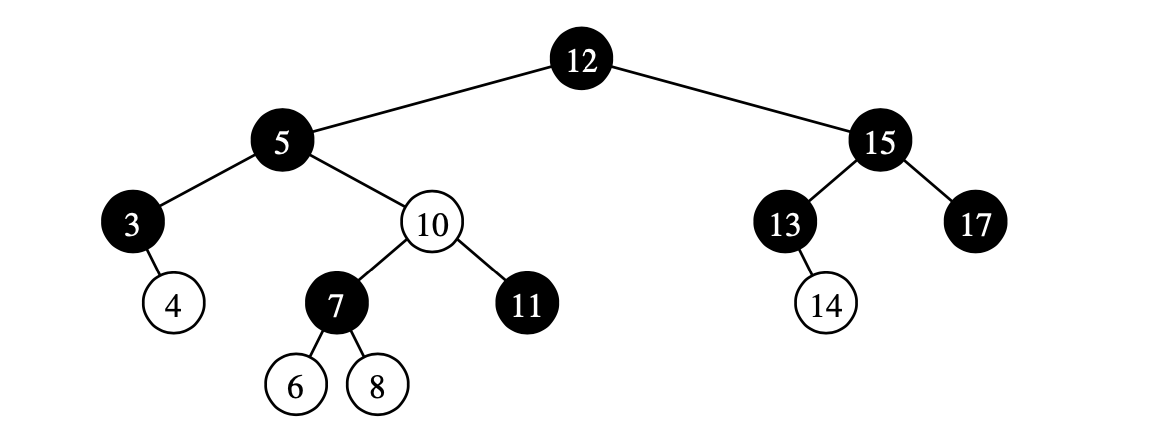

#### 红黑树与（2，4）树的相互转换

1. 红黑树转换（2，4）树
    - Merging every red node w into its parent
    - The children of w becoming ordered children of the parent
    
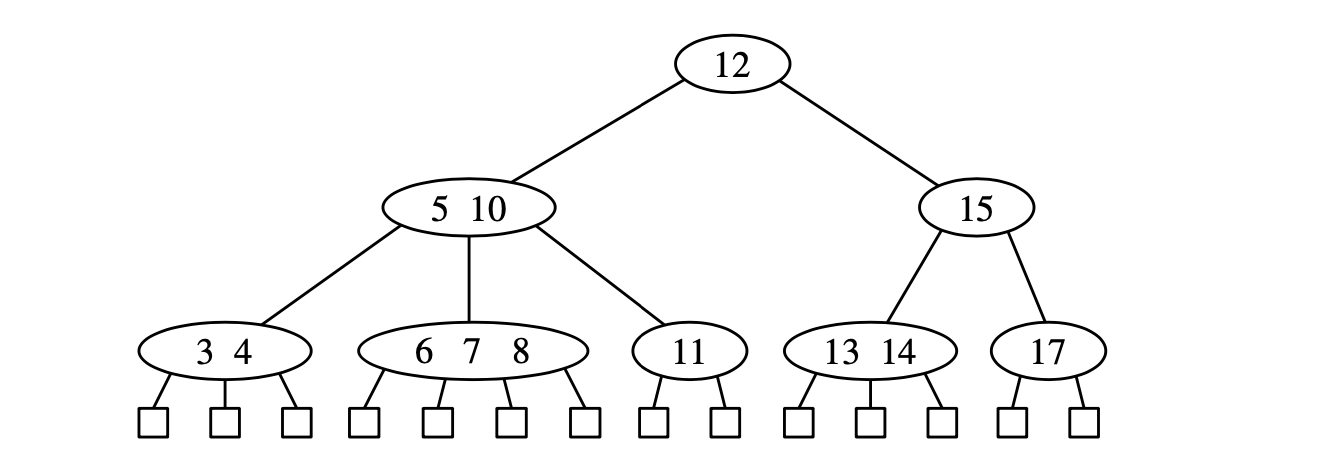

2. （2，4）树转换红黑树
    - If w is a 2-node, keep the black children of w as is
    - If w is a 3-node, then create a new red node y, give w's last two (black) children to y, and make the first child of w and y be the two children of w
    - If w is a 4-node, then create two new red nodes y and z, give w's first two (black) children to y, last two (black) children to z, and make y and z be the two children of w

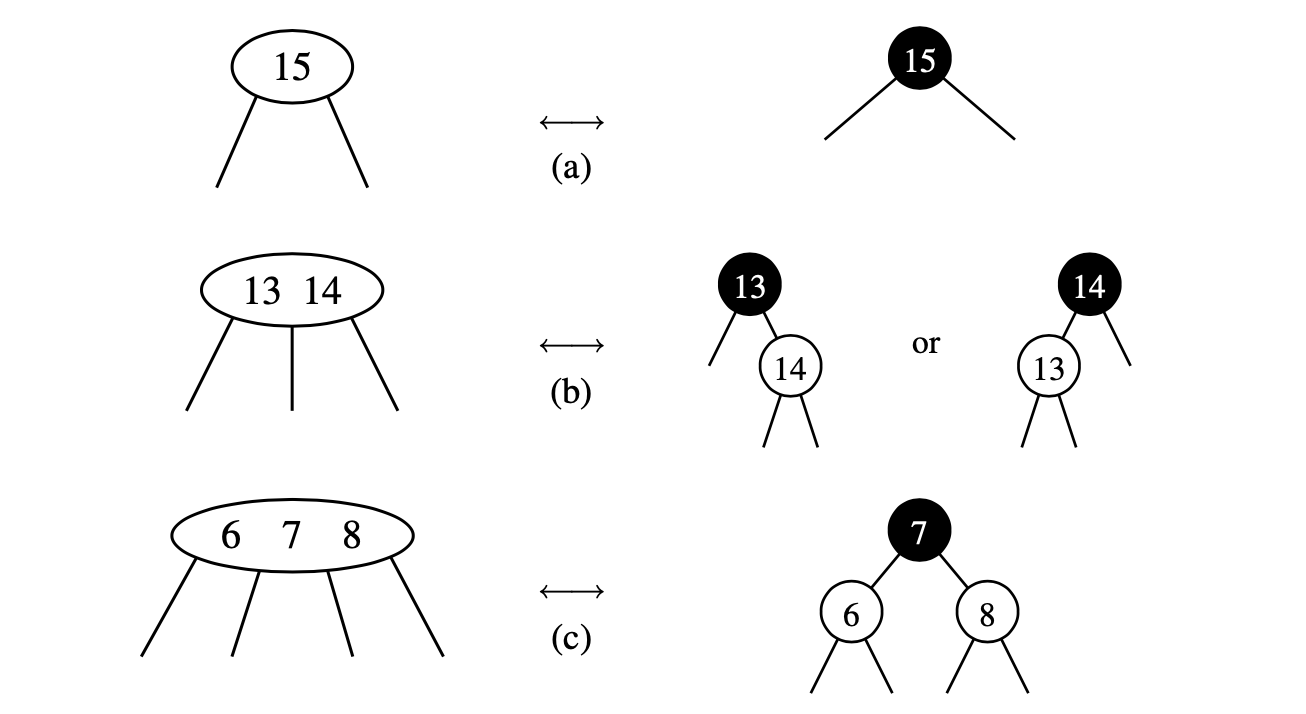


#### The height of red-black storing n entries is O(logn)

1. d is the common black depth of all nodes of T
2. The (2,4) tree associated with T has height h'
3. h' = d
4. d = h' <= log(n+1) - 1
5. The height of red node <= d, h <= 2d


So we have:
$$log(n+1) -1 <= h <= 2log(n+1) - 1$$

### 6.1 Red-Black Tree Operations

#### Insertion

1. 如果新插入的node x是根节点，即原树为空
    - x 为black
2. 其他任意情况，新插入的node x
    - x 为red
    - 如果x的parent y也为red，会产生double red violation
    
Double Red Violation:
1. Case 1: The sibling s of y is Black or None
    - Denotes the fact that we have added the new node x to a corresponding 3-node of the (2,4) tree T'
    - Perform a **trinode restructuring**
    - restructure(x)
    - 即：从左到右依次标记为a，b，c，用b与grandparent替换，并让a与c成为b的children
    - 在这种情况下，树T的black depth保持不变

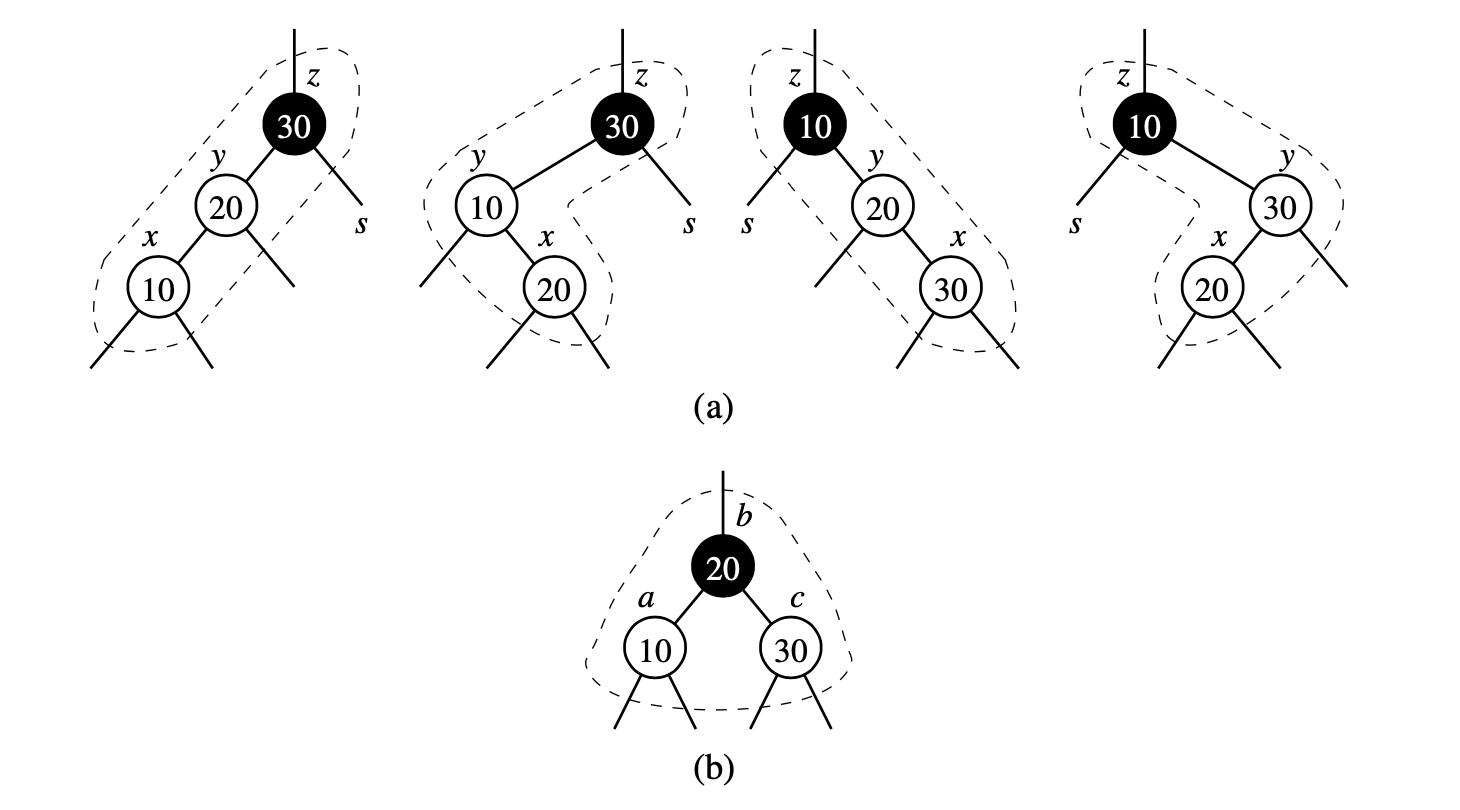

2. Case 2: The sibling s of y is Red
    - Denotes the overflow in the corresponding (2,4) tree T'
    - Perform a **recoloring** as the equivalent split operation
    - 即：color y and its sibling s black
    - 如果他们的parent z是根节点，保持颜色不变，不是根节点，color as red
    - 有可能使grandparent z产生新的double red problem，最多需要改变height的一半次
    - 在根节点颜色不变的情况下，black depth + 1，其他情况保持不变
    
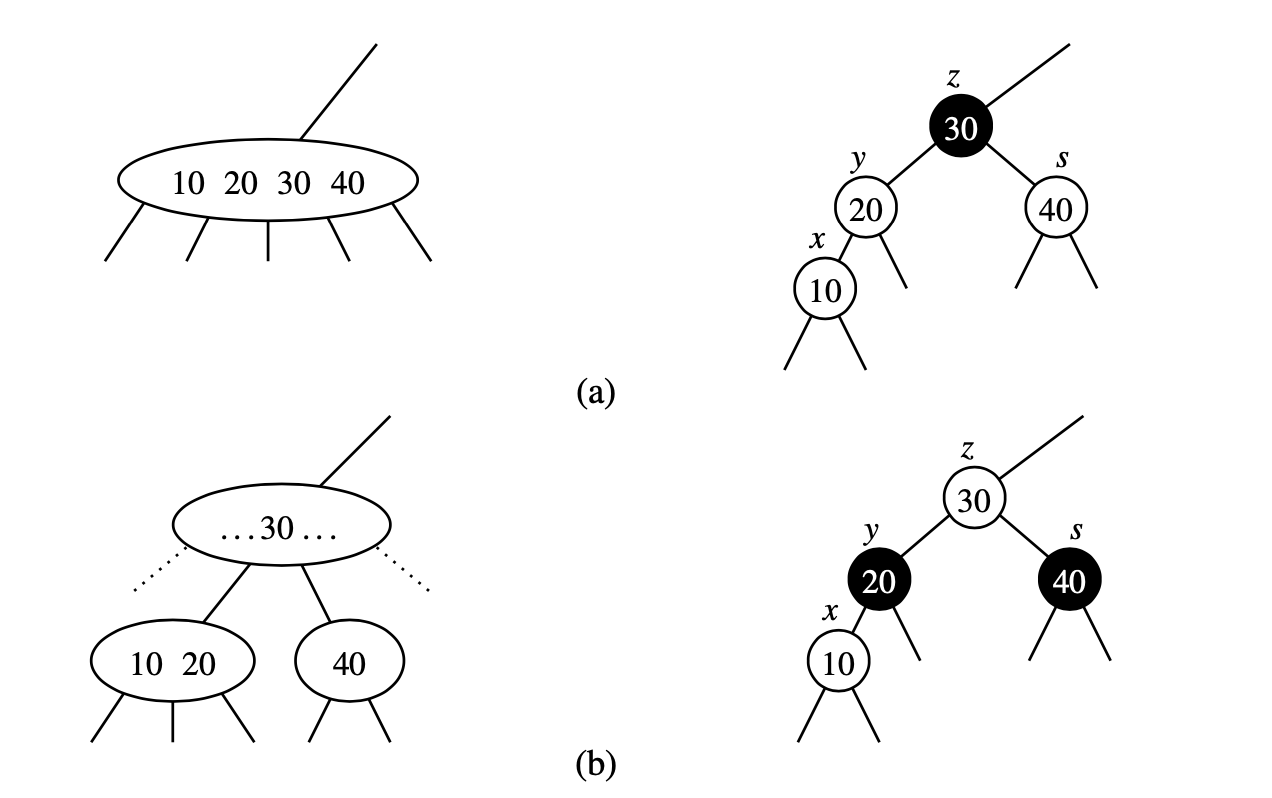

Insertion of the sequence:
    4-7-12-15-3-5-14-18-16-17

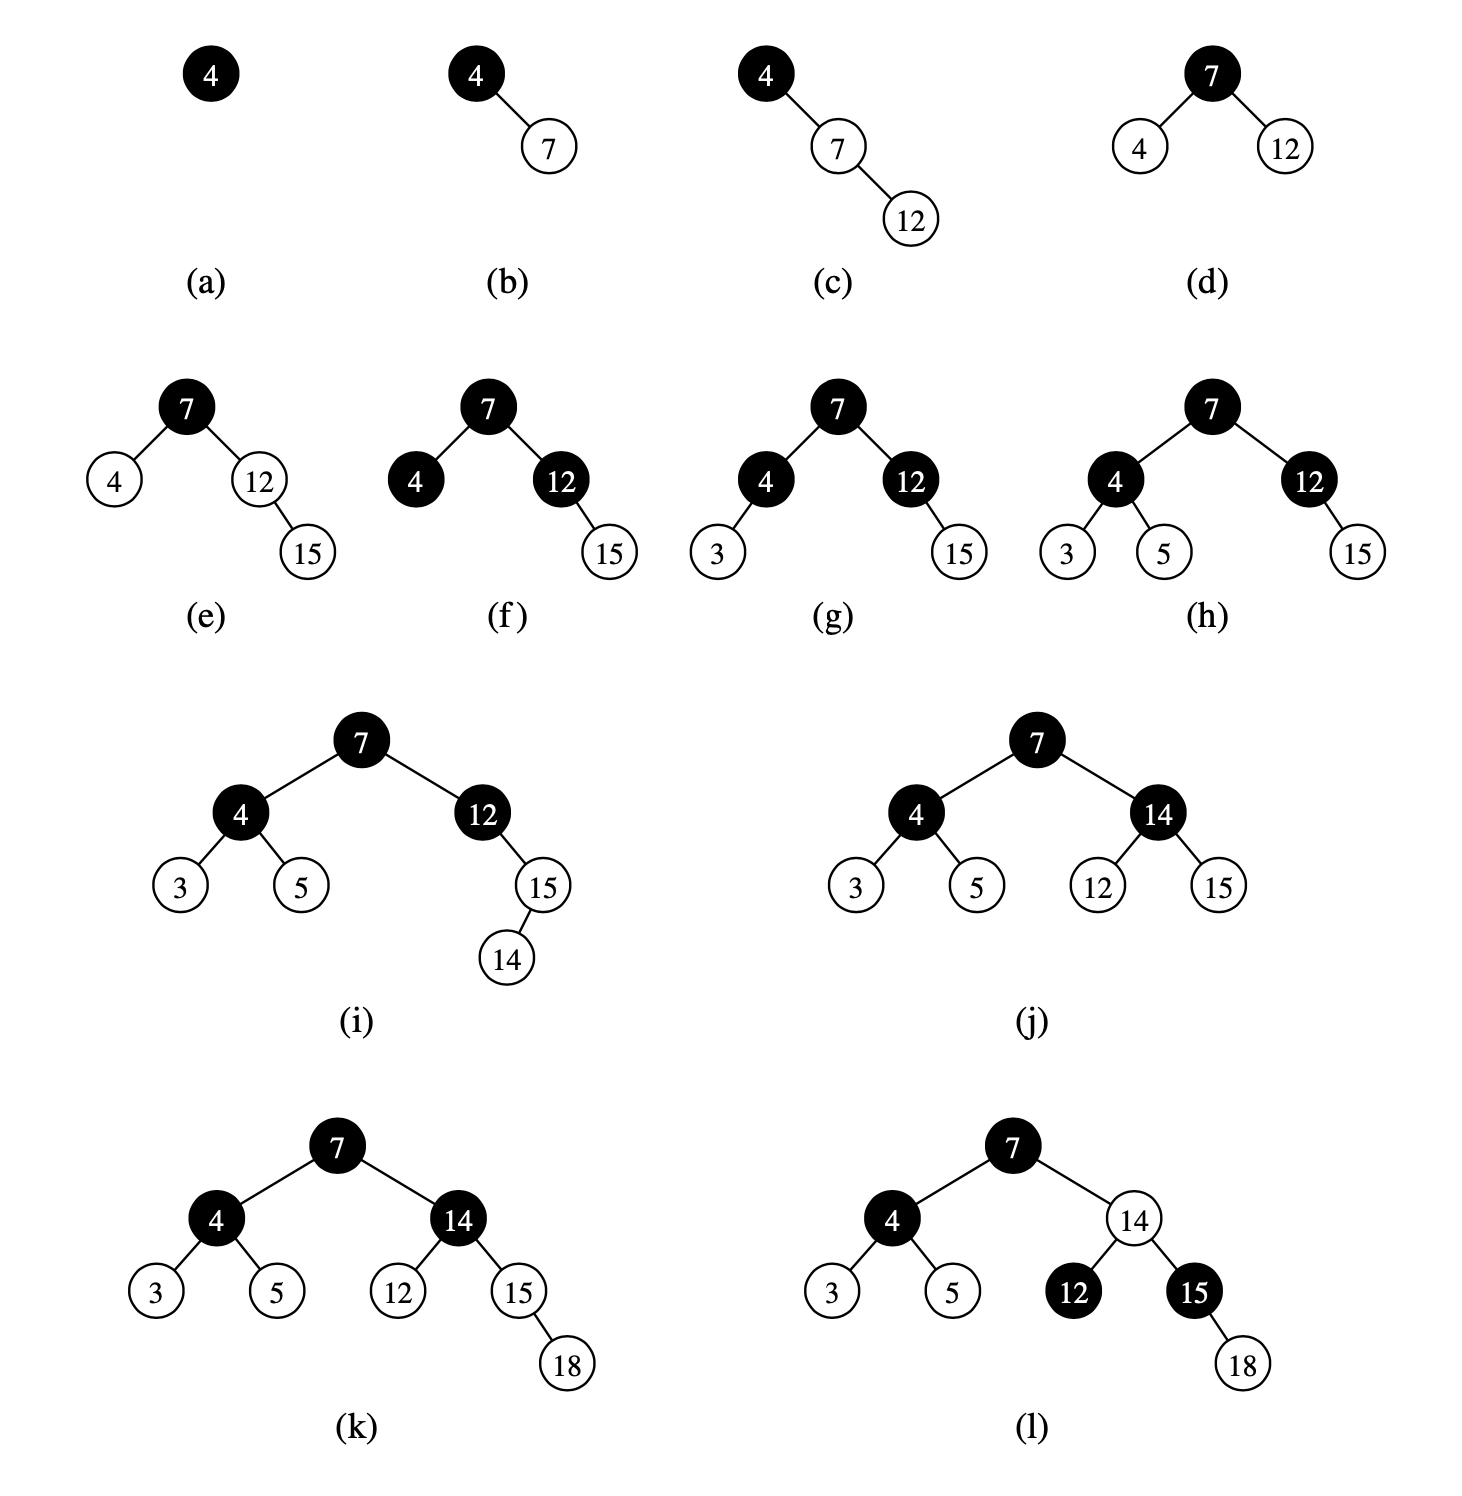

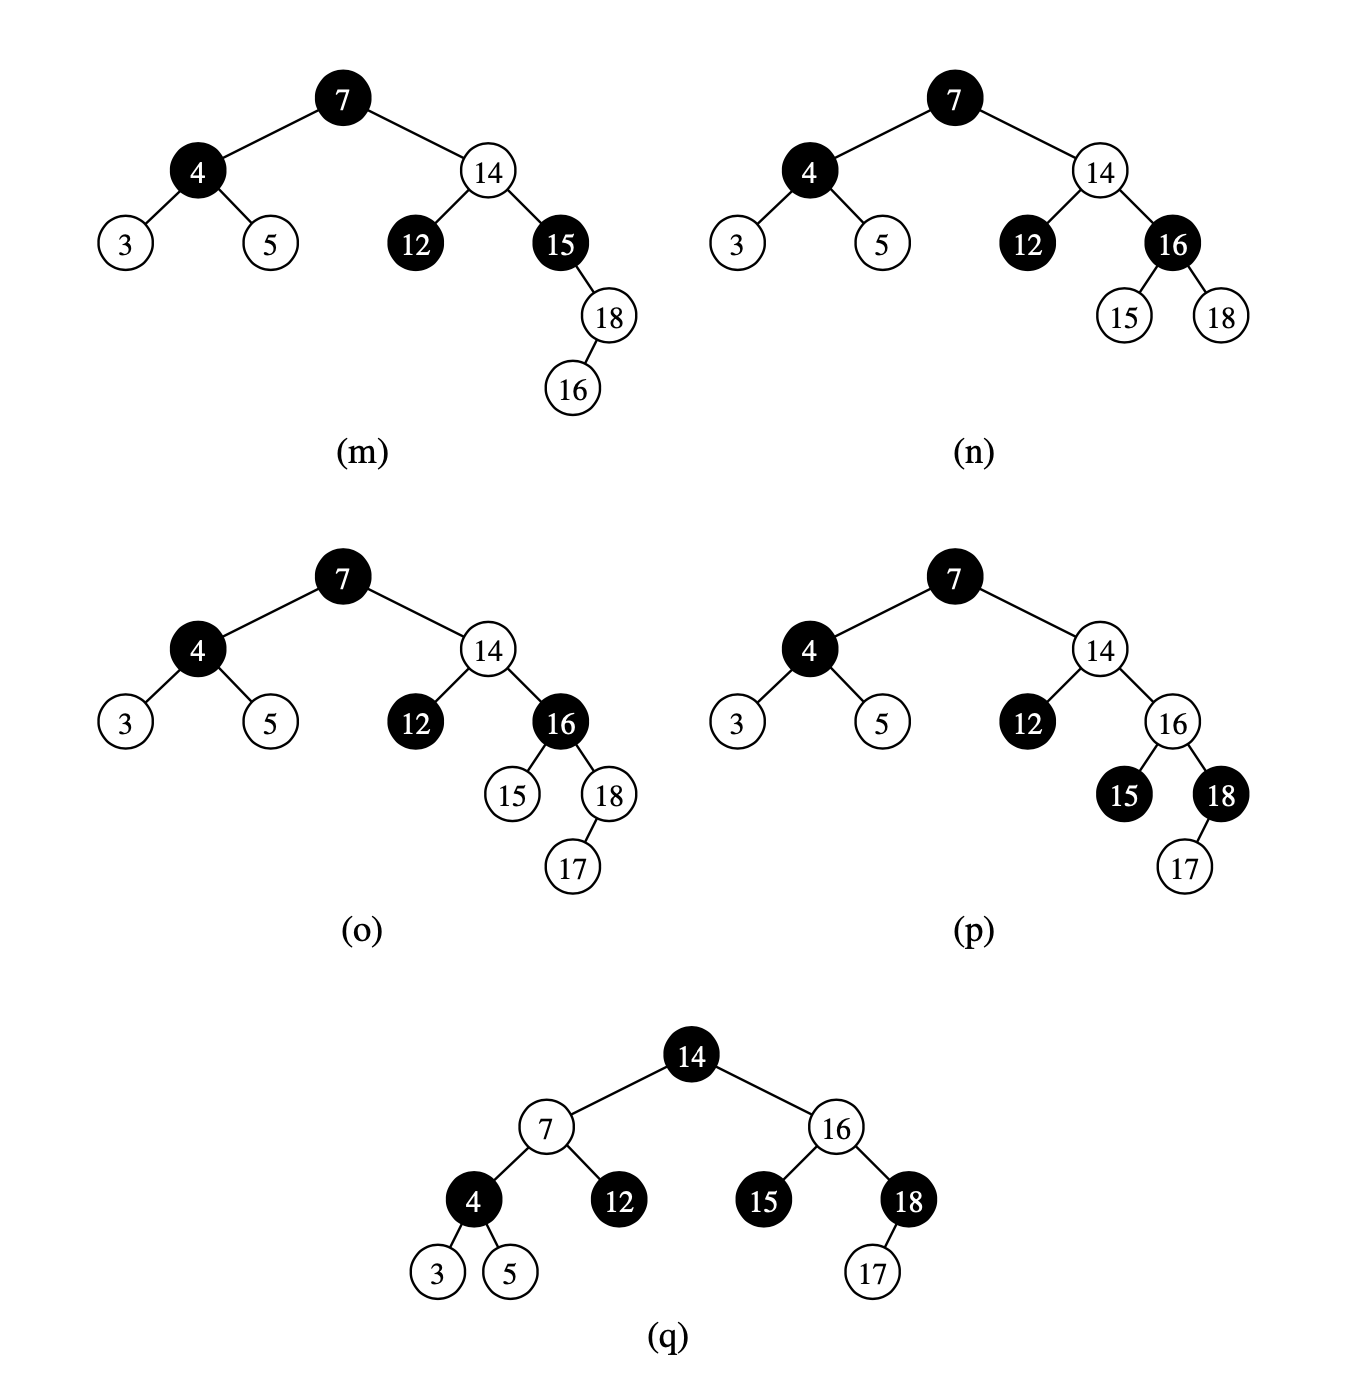

#### Deletion

Deletion from a binary search tree:
    - 1. delete the node with at most one child
        - delete the node and promote the child
    - 2. delete the node with two children
        - replace the node with its predecessor
        - delete the predecessor node

所以deletion in red-black tree可归类为删除children数小于等于1的node，分为以下情况：

1. Removed node was red
    - Not affect the black depth and not introduce red violation
    - Shrinking of a 3-node or 4-node in (2,4) tree
    - deletion之后不需要改变


2. Removed node had one child that was a red leaf
    - Restore the black properties by recoloring the promoted child to black
 
 
3. Removed node was a nonroot black leaf
    - This removed node must have a sibling whose subtree has black height 1
    - Without rebalancing, results in a deficit of one for the black depth

**General setting of a Deficit**

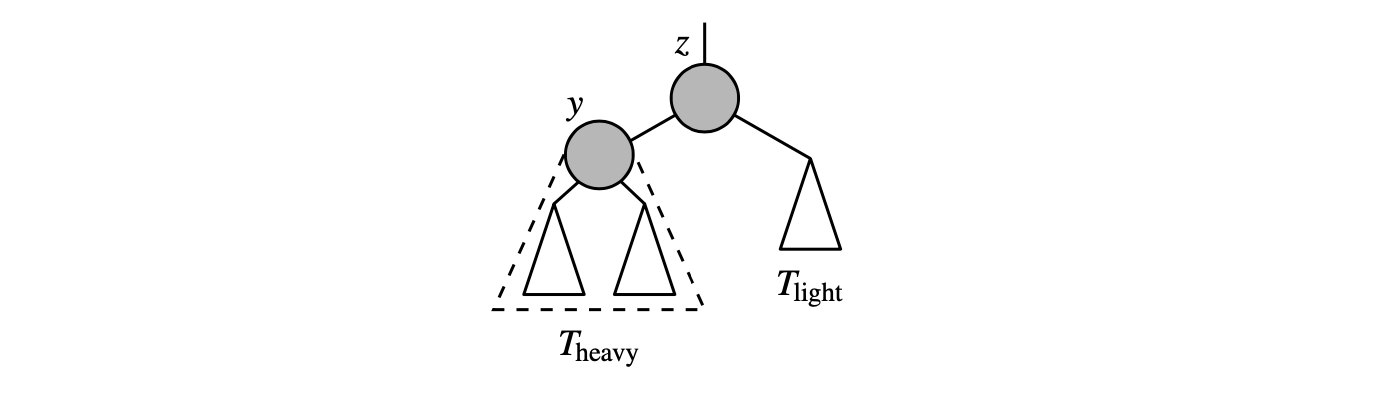

After a black leaf deletion of $T_{light}$, the black depth of $T_{heavy}$ is exactly one more than $T_{light}$


$T_{light}$ is an empty subtree that remains after the deletion

**There are 3 possible cases to remedy a deficit**

1. Node y is black and has a red child x
    - Perform a **trinode restructuring** on the red child x
    - Then color a and c black
    - Then give b the formor color of grandparent z
    - Corresponding to a transfer operation in (2,4) tree

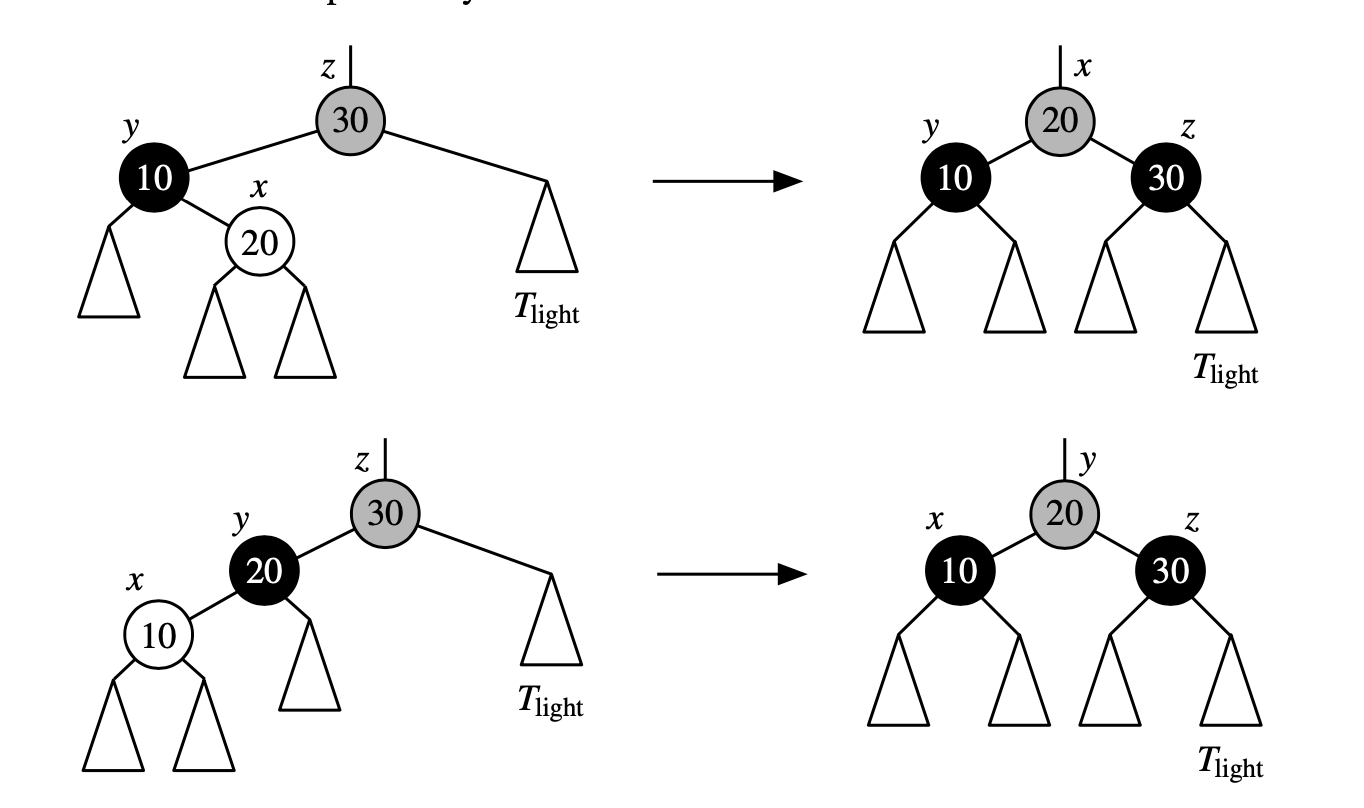

2. Node y is black and both children of y are black or None
    - Perform a **recoloring**: color y red, and if z is red, color it black
    - 当z是红色node时，即相当于y是$T_{light}$的immediate sibling
        - 不需要进行下一步操作
    - 当z是黑色node时，recoloring使z的两个subtree拥有相同的black depth，把以z为root的subtree当作$T_{light}$再进行remedy deficit
        - 需要进行下一步操作
        
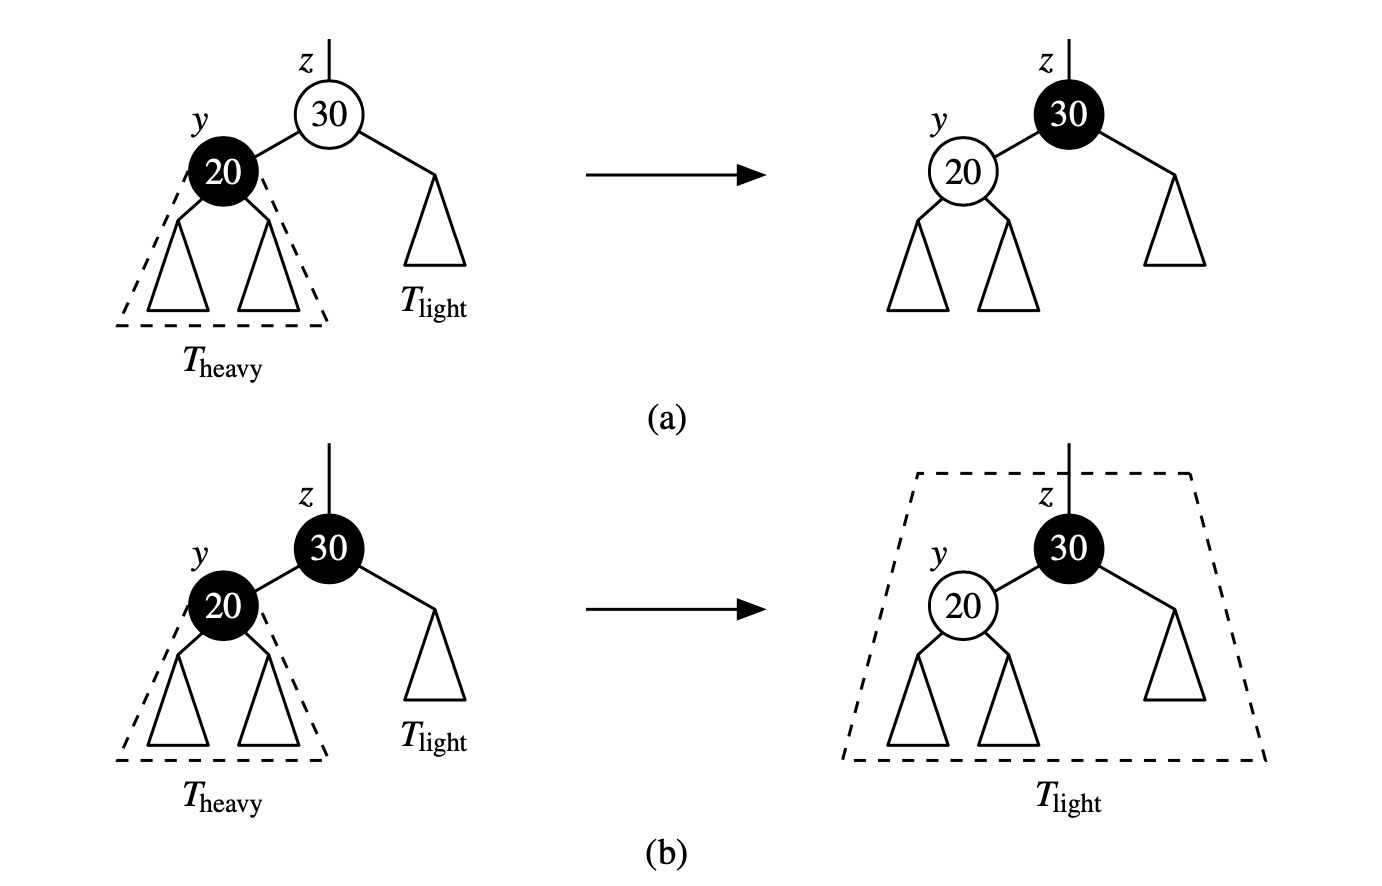

3. Node y is Red
    - z must be black, the two subtree of y must each have a black root
    - perform a **rotation** about y and z
    - then recolor y black and z red
        - 需要进行下一步操作，此时z是不平衡的
    
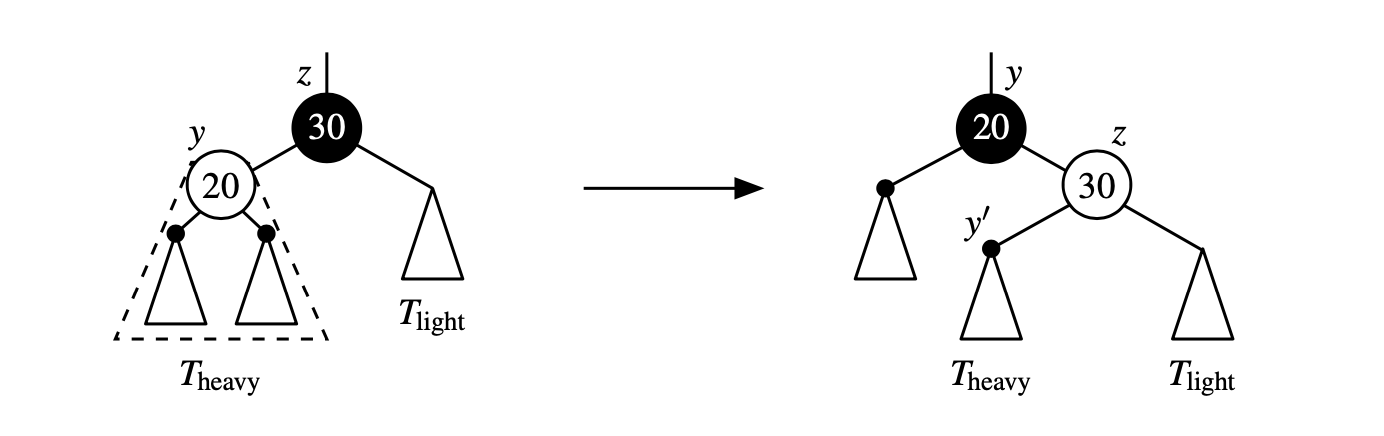

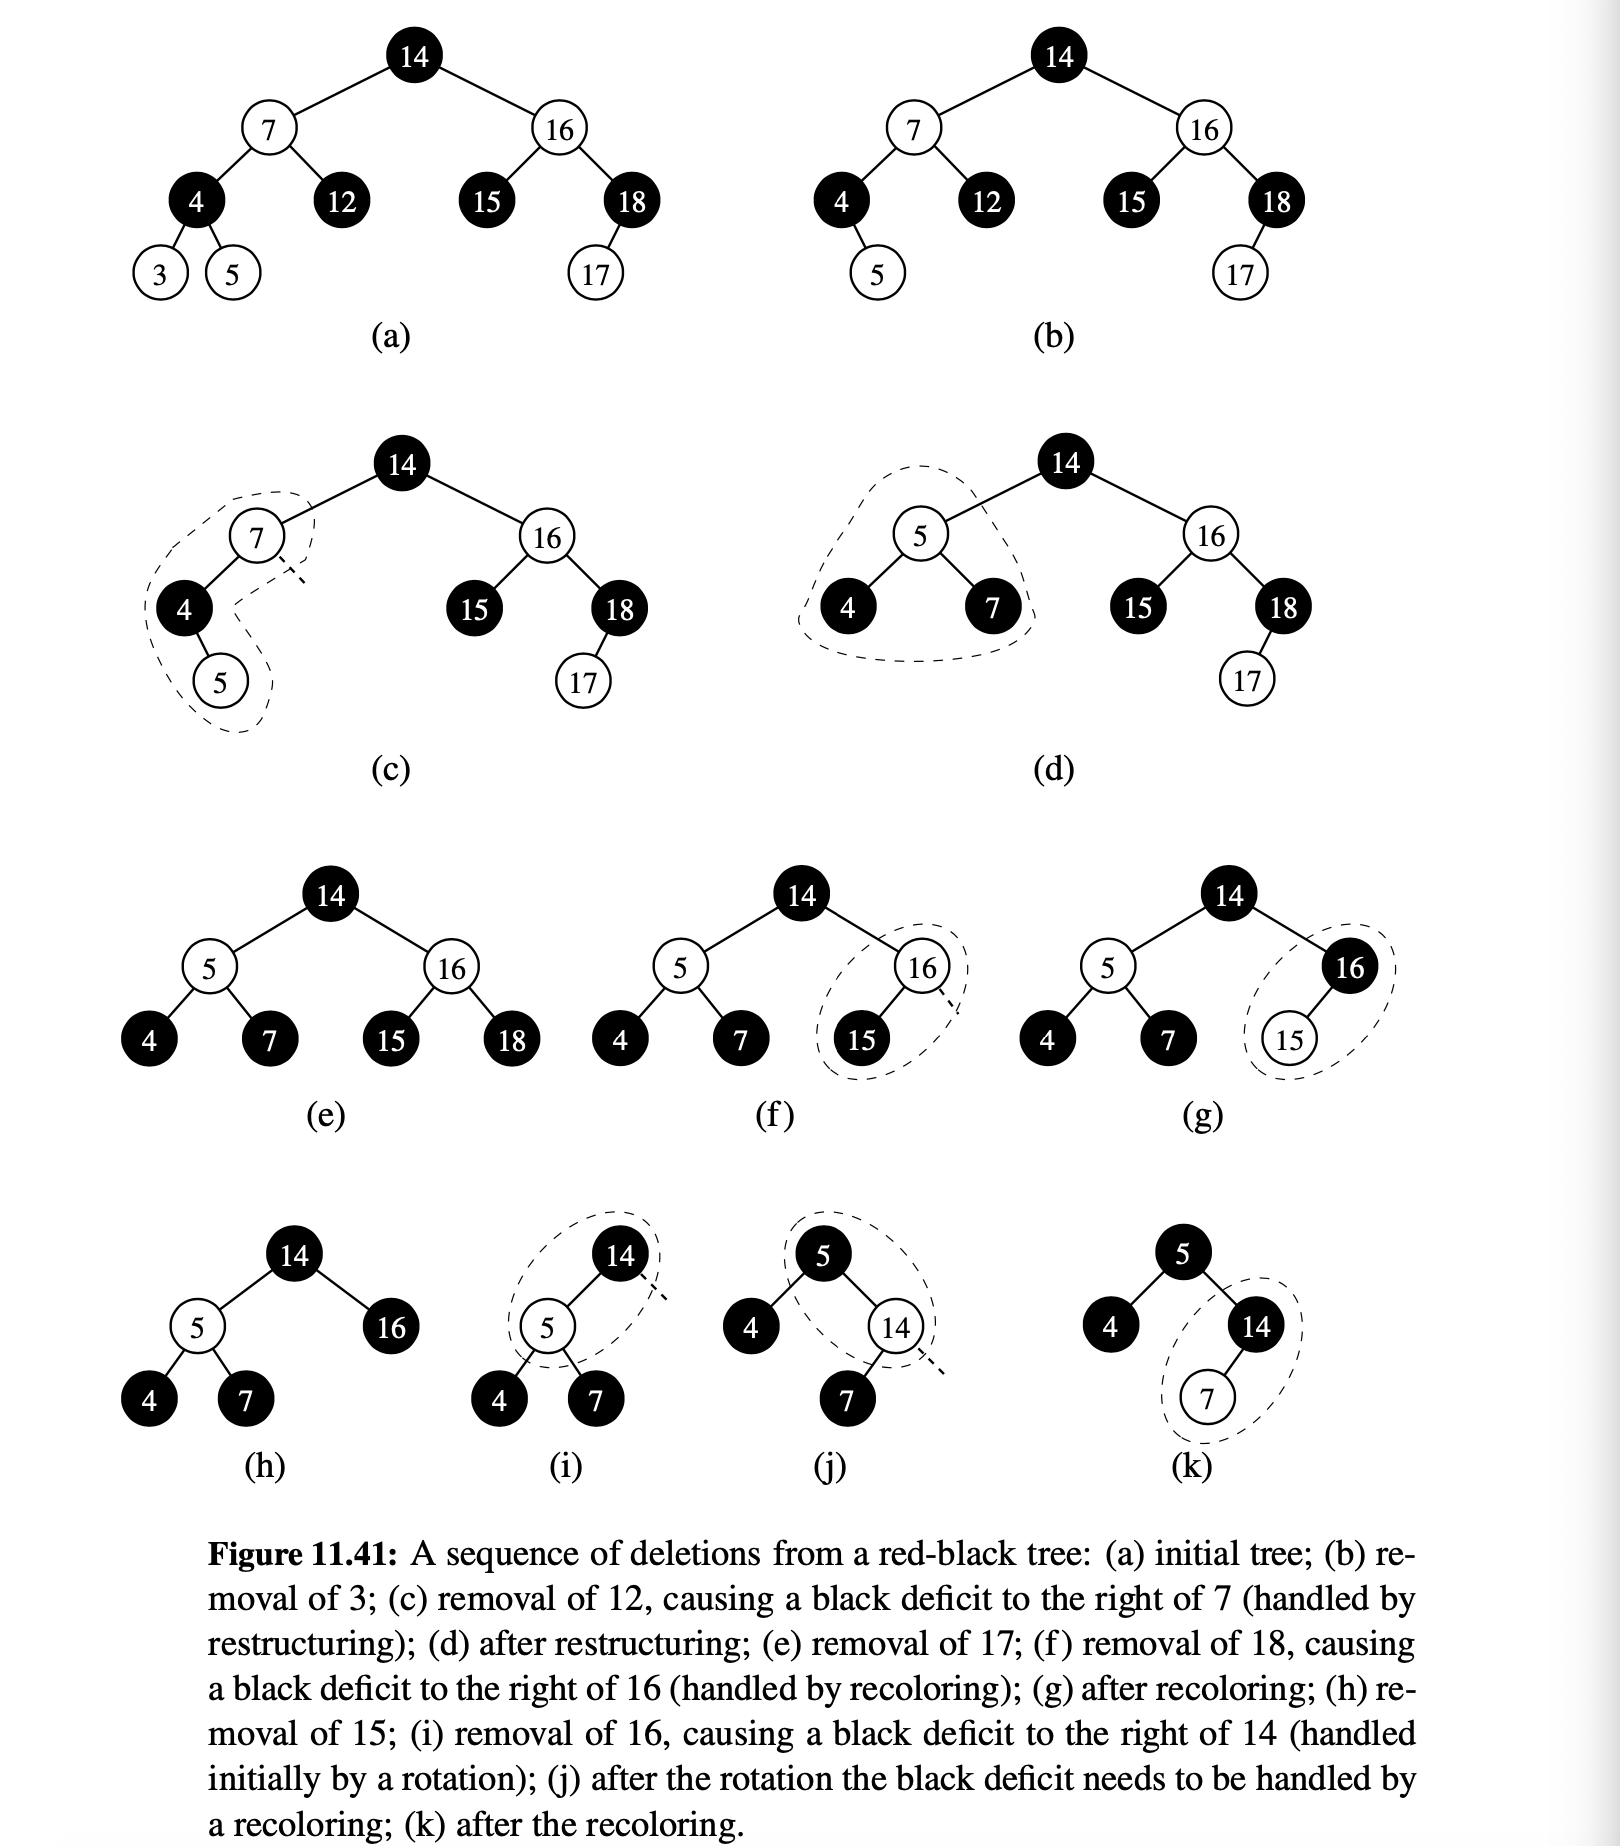

#### Performance of Red-Black Trees

1. Insertion:
    - O(logn)
    - O(logn) recorlorings and at most one trinode restructuring
2. Deletion:
    - O(logn)
    - O(logn) recorloring and at most two restructuring operations

### 6.2 Python Implementation

In [4]:
class RedBlackTreeMap(TreeMap):
    '''
    Sorted map implementation using a red-black tree
    '''
    class _Node(TreeMap._Node):
        '''
        Node class for red-black tree maintain bit that denotes color
        '''
        __slots__ = '_red'
        
        def __init__(self, element, parent = None, left = None, right = None):
            super().__init__(element, parent, left, right)
            # new node is red by default
            self._red = True
            
    #------------- positional-based utility methods ---------------------
    def _set_red(self, p):
        p._node._red = True
        
    def _set_black(self, p):
        p._node._red = False
        
    def _set_color(self, p, make_red):
        p._node._red = make_red
        
    def _is_red(self, p):
        return p is not None and p._node._red
    
    def _is_red_leaf(self, p):
        return self._is_red(p) and self.is_leaf(p)
    
    def _get_red_child(self, p):
        for child in (self.left(p),self.right(p)):
            if self._is_red(child):
                return child
        return None
    
    #------------- support for insertions--------------------------------
    def _rebalance_insert(self, p):
        # new node is always red
        self._resolve_red(p)
        
    def _resolve_red(self, p):
        if self.is_root(p):
            self._set_black(p)
        else:
            parent = self.parent(p)
            # double red problem
            if self._is_red(parent):
                uncle = self.sibling(parent)
                # Case 1
                if not self._is_red(uncle):
                    middle = self._restructure(p)
                    self._set_black(middle)
                    self._set_red(self.left(middle))
                    self._set_red(self.right(middle))
                # Case 2
                else:
                    grand = self.parent(parent)
                    self._set_red(grand)
                    self._set_black(self.left(grand))
                    self._set_black(self.right(grand))
                    self._resolve_red(grand)
                    
    #------------- support for deletions-------------------------------
    def _rebalance_delete(self, p):
        if len(self) == 1:
            self._set_black(self.root())
        elif p is not None:
            n = self.num_children(p)
            if n == 1:
                c = next(self.children(p))
                # deficit exists unless child is a red leaf
                if not self._is_red_leaf(c):
                    self._fix_deficit(p,c)
            elif n == 2:
                if self._is_red_leaf(self.left(p)):
                    self._set_black(self.left(p))
                else:
                    self._set_black(self.right(p))
                    
    def _fix_deficit(self, z, y):
        '''
        Resolve black deficit at z, where y is the root of z's heavier subtree
        '''
        if not self._is_red(y):
            x = self._get_red_child(y)
            # Case 1: y is black and has red child x, transfer
            if x is not None:
                old_color = self._is_red(z)
                middle = self._restructure(x)
                self._set_color(middle, old_color)
                self._set_black(self.left(middle))
                self._set_black(self.right(middle))
            # Case 2, y is black, fusion
            else:
                self._set_red(y)
                if self._is_red(z):
                    self._set_black(z)
                elif not self.is_root(z):
                    self._fix_deficit(self.parent(z),self.sibling(z))
        # Case 3: y is red, rotation
        else:
            self._rotate(y)
            self._set_black(y)
            self._set_red(z)
            if z == self.righ(y):
                self._fix_deficit(z, self.left(z))
            else:
                self._fix_deficit(z, self.right(z))               